## Abstract

 - This Notebook contains standard some basic analysis over different creator coin economies currently live on the Rally network
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from pandas.plotting import register_matplotlib_converters

%matplotlib inline 
# pd.options.display.float_format = "{:,.3f}".format

### **1. slopes.json File** ([Creator Coin 101](https://medium.com/rallynetwork/creator-coin-101-a-brief-explainer-on-rallys-first-building-block-39d33ead5cf7))
    - The sigmoid token bonding curve being used by the Rally Network is expressed as a series of line segments defined by x coordinates and slopes provided in the 'slopes.json' file approximating the sigmoid function which relates the total supply of a creator coin to its price denominated in RLY 

In [2]:
slopes = pd.read_json ('./slopes.json')

slopes.rename(columns={'start_point':'x-axis'}, inplace=True)
slopes['slope'] = slopes['slope'].apply(lambda x: x*1e7)
slopes['x-axis'] = slopes['x-axis'].apply(lambda x: x/1e6)
slopes['y-axis'] = 0

In [3]:
y_col = 0
prev_y = 0

for index in slopes.index:
    slopes.loc[index,'y-axis'] = slopes.loc[index,'slope']*slopes.loc[index,'x-axis'] + prev_y
    prev_y = slopes.loc[index,'y-axis']

slopes['y-axis'] = slopes.apply(lambda row : row['y-axis']*30/10000, axis=1 )
    
# slopes.convert_dtypes()

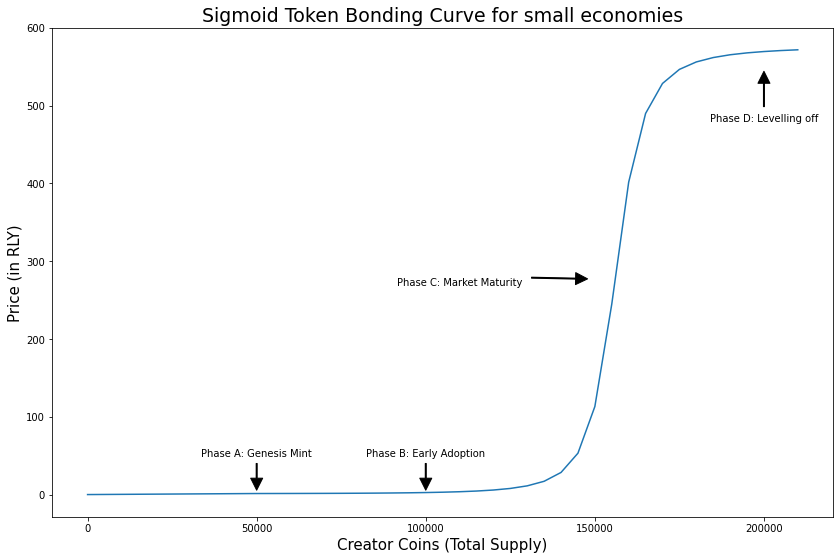

In [4]:
plt.rcParams["figure.figsize"] = (14,9)
plt.title('Sigmoid Token Bonding Curve for small economies',fontsize=19)
plt.plot('x-axis','y-axis',data=slopes)
plt.xlabel('Creator Coins (Total Supply)',fontsize=15)
plt.ylabel('Price (in RLY)',fontsize=15)
plt.annotate('Phase A: Genesis Mint', xy=(50000, 1),  xycoords='data',
            xytext=(50000, 60), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase B: Early Adoption', xy=(100000, 1),  xycoords='data',
            xytext=(100000, 60), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase C: Market Maturity', xy=(150000, 277),  xycoords='data',
            xytext=(110000, 279), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase D: Levelling off', xy=(200000, 550),  xycoords='data',
            xytext=(200000, 490), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.savefig("images/LabelledSigmoidTBC.png")
# print(slopes.head())

In [5]:
slopes

slope    x-axis      y-axis
0   6.179952e-08       0.0    0.000000
1   8.858250e-03   49000.0    1.302163
2   1.705450e-04   50000.0    1.327744
3   1.963530e-04   55000.0    1.360143
4   2.276330e-04   60000.0    1.401117
5   2.659120e-04   65000.0    1.452970
6   3.132570e-04   70000.0    1.518753
7   3.725110e-04   75000.0    1.602568
8   4.476560e-04   80000.0    1.710006
9   5.443790e-04   85000.0    1.848823
10  6.709810e-04   90000.0    2.029987
11  8.398920e-04   95000.0    2.269357
12  1.070260e-03  100000.0    2.590435
13  1.392590e-03  105000.0    3.029100
14  1.857300e-03  110000.0    3.642009
15  2.551630e-03  115000.0    4.522322
16  3.634580e-03  120000.0    5.830771
17  5.414900e-03  125000.0    7.861358
18  8.539350e-03  130000.0   11.191705
19  1.449210e-02  135000.0   17.061005
20  2.705740e-02  140000.0   28.425113
21  5.689550e-02  145000.0   53.174656
22  1.332300e-01  150000.0  113.128156
23  2.830460e-01  155000.0  244.744546
24  3.265040e-01  160000.0  401.466466
25  1.784300e-01  165000.0  489.789316
26  7.560570e-02  170000.0  528.348223
27  3.444730e-02  175000.0  546.433055
28  1.775090e-02  180000.0  556.018541
29  1.014960e-02  185000.0  561.651569
30  6.288860e-03  190000.0  565.236219
31  4.145810e-03  195000.0  567.661518
32  2.869140e-03  200000.0  569.383002
33  2.064300e-03  205000.0  570.652547
34  1.533040e-03  210000.0  571.618362

## Sigmoid Token Bonding Curve (Currently used by Rally) :


The sigmoid curve visible above is the one that is being used for calculating the exchange price of creator coins against RLY.
These pricing curves define the behavior of an automated market maker (AMM) that provides the liquidity to anyone interested in buying or selling a Creator Coin.

**Phase A: Genesis Mint**
    - Upon instantiation, first 50,000 coins are minted with a small amount of locked liquidity which go to the corresponding creator
    
**Phase B: Early Adoption**
    - Slope starts increasing gradually which creates an opportunity for early adopters to acquire a meaningful share of creator coins for a relatively modest price.
    
**Phase C: Market Maturity**
    - Slope increases more significantly which results in volatilie price swings in response to demand which creates opportunities for interesting interactions around Creator Coins and the digital assets (NFTs) they may support.

**Phase D: Levelling off**
    - in segment ‘D’ we arrive at a leveling off of price and eventually hit our effective supply cap of 210,000 coins. 

**The Following mathematical equation describes the Sigmoidal Token Bonding Curve**
<div>
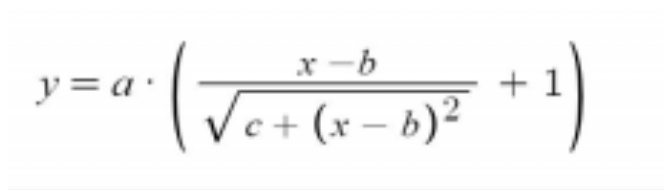
</div>
Where: <br>
 - a = maximum token price / 2 (height of the curve) <br>
 - b = token supply at the inflection point (when the incentives begin to diminish) <br>
 - c = “steepness” of the curve <br>
 - m = constant which establishes the vertical position

## SECTION B - CREATOR COINS METRICS ANALYSIS

In [6]:
sideChainDF = pd.read_csv('dataFiles/rly_sidechain_20210412.csv',parse_dates=['GMT'],index_col=['GMT'])

In [7]:
sideChainDF = pd.read_csv('dataFiles/rly_sidechain_20210412.csv')

In [8]:
sideChainDF.drop(['Unnamed: 0'],axis=1,inplace=True)
sideChainDF.drop(['name'],axis=1,inplace=True)

sideChainDF.drop(['operator'],axis=1,inplace=True)
sideChainDF.drop(['log.transactionLogIndex'],axis=1,inplace=True)
sideChainDF.drop(['log.topics.0'],axis=1,inplace=True)
sideChainDF.drop(['log.topics.1'],axis=1,inplace=True)
sideChainDF.drop(['log.topics.2'],axis=1,inplace=True)
sideChainDF.drop(['log.topics.3'],axis=1,inplace=True)
sideChainDF.drop(['unixts'],axis=1,inplace=True)

sideChainDF.drop(['timestamp'],axis=1,inplace=True)
sideChainDF.drop(['date'],axis=1,inplace=True)
sideChainDF.drop(['hour'],axis=1,inplace=True)

sideChainDF.drop(['log.blockNumber'],axis=1,inplace=True)
sideChainDF.drop(['log.removed'],axis=1,inplace=True)
sideChainDF.drop(['log.transactionIndex'],axis=1,inplace=True)
sideChainDF.drop(['log.transactionHash'],axis=1,inplace=True)
sideChainDF.drop(['log.logIndex'],axis=1,inplace=True)
sideChainDF.drop(['log.logType'],axis=1,inplace=True)
sideChainDF.drop(['log.data'],axis=1,inplace=True)
sideChainDF.drop(['log.address'],axis=1,inplace=True)
sideChainDF.drop(['log.blockHash'],axis=1,inplace=True)
sideChainDF.drop(['id_total_rc_bonded_post_tx'],axis=1,inplace=True)
sideChainDF.drop(['USD/Rally Implied Market Cap'],axis=1,inplace=True)


sideChainDF.rename(columns={'id_supply_change':'Supply Change'}, inplace=True)
sideChainDF.rename(columns={'id_supply_post_tx':'Total Circulating Supply'}, inplace=True)
sideChainDF.rename(columns={'id_supply_pre_tx':'Total Circulating Supply (Prev.)'}, inplace=True)
sideChainDF.rename(columns={'rc_auc_post_tx':'Total RLY locked'}, inplace=True)
sideChainDF.rename(columns={'rc_auc_pre_tx':'Total RLY locked (Prev)'}, inplace=True)
sideChainDF.rename(columns={'rc_bonded_during_tx':'Delta RLY'}, inplace=True)

sideChainDF['value'] = sideChainDF['value'].apply(lambda x: x/1e6)
sideChainDF['Supply Change'] = sideChainDF['Supply Change'].apply(lambda x: x/1e6)
sideChainDF['Total Circulating Supply'] = sideChainDF['Total Circulating Supply'].apply(lambda x: x/1e6)
sideChainDF['Total Circulating Supply (Prev.)'] = sideChainDF['Total Circulating Supply (Prev.)'].apply(lambda x: x/1e6)
sideChainDF['Total RLY locked'] = sideChainDF['Total RLY locked'].apply(lambda x: x/1e6)
sideChainDF['Total RLY locked (Prev)'] = sideChainDF['Total RLY locked (Prev)'].apply(lambda x: x/1e6)
sideChainDF['Delta RLY'] = sideChainDF['Delta RLY'].apply(lambda x: x/1e6)

In [9]:
newSideChain = sideChainDF.copy()

In [10]:
newSideChain.drop(['from'],axis=1,inplace=True)
newSideChain.drop(['to'],axis=1,inplace=True)
newSideChain.drop(['Supply Change'],axis=1,inplace=True)
newSideChain.drop(['value'],axis=1,inplace=True)
newSideChain.drop(['Delta RLY'],axis=1,inplace=True)
newSideChain.drop(['Total Circulating Supply (Prev.)'],axis=1,inplace=True)
newSideChain.drop(['Total RLY locked (Prev)'],axis=1,inplace=True)
newSideChain.drop(['USD/Rally Mean'],axis=1,inplace=True)

newSideChain = newSideChain[newSideChain.id != 'COIN']

newSideChain = newSideChain[newSideChain.id != 'TESTA']
newSideChain = newSideChain[newSideChain.id != 'TESTB']
newSideChain = newSideChain[newSideChain.id != 'TESTC']
newSideChain = newSideChain[newSideChain.id != 'TESTD']
newSideChain = newSideChain[newSideChain.id != 'TESTE']
newSideChain = newSideChain[newSideChain.id != 'TESTF']
newSideChain = newSideChain[newSideChain.id != 'TESTG']

newSideChain = newSideChain[newSideChain.id != '56']
newSideChain = newSideChain[newSideChain.id != '57']
newSideChain = newSideChain[newSideChain.id != '58']
newSideChain = newSideChain[newSideChain.id != '59']
newSideChain = newSideChain[newSideChain.id != '60']
newSideChain = newSideChain[newSideChain.id != '61']
newSideChain = newSideChain[newSideChain.id != '62']
newSideChain = newSideChain[newSideChain.id != '63']
newSideChain = newSideChain[newSideChain.id != '64']
newSideChain = newSideChain[newSideChain.id != '65']
newSideChain = newSideChain[newSideChain.id != '103']
newSideChain = newSideChain[newSideChain.id != '104']
newSideChain = newSideChain[newSideChain.id != '105']
newSideChain = newSideChain[newSideChain.id != '106']


In [11]:
CreatorCoinNames = newSideChain.id.unique()
CreatorCoinNames

array(['STANZ', 'WWC', 'CHEWS', 'ROFF', 'FAN', 'VIBE', 'DTQ', 'PIGGY',
       'PANGO', 'MOON', 'SUUN', 'CKC', 'TINA', 'VVCN', 'ARVCN', 'ALLIE',
       'JANEY', 'NNKC', 'BTC', 'SKOT', 'MIZZY', 'CHOU', 'KSK', 'FLYNN',
       'GGSC', '3CR8', 'SUSIE', 'CON', 'SCRLA', 'PRO', 'SHIPR', 'CHRIS',
       'AUG', 'PTM', 'DRZFR', 'SOUL', 'RALEX', 'DRAZE', 'MAYOR', 'SRSH',
       'PPC', 'STEP', 'VNSH', 'VIBU', 'JOW', 'BEE', 'BOO', 'FAB5', 'PSTL',
       'DOA', 'JASON', 'YOKAI', 'CMO', 'MIND', 'CLUB', 'ART', 'SHANK',
       'DNGL', 'WORK', 'DOC', 'WRITE', 'MONTY', 'JAFFE', 'FOUSH', 'CRIME',
       'CREW', 'ARK', 'TESTH', 'CXM', 'NEXX', 'GARY', 'JAY', 'SMRT',
       'TILT', 'GOOD', 'BOT', 'WORD', 'KARMA', 'AMA', 'ADHD', 'HUMAN',
       'WOMXN', 'POWER', 'BOLD', 'DAD', 'WAXM', 'B2B', 'CPA', 'GROG',
       'ELV', 'GEO', 'BLAP', 'SNDR', 'COM'], dtype=object)

In [12]:
CreatorCoinNames = newSideChain.id.unique()

print('Total Creator coins currently live on the network = ' + str(len(CreatorCoinNames)))

for i in range(1,len(CreatorCoinNames)):
    circSupply = newSideChain[newSideChain.id == CreatorCoinNames[i]].tail(1)['Total Circulating Supply']
    rlyLocked = newSideChain[newSideChain.id == CreatorCoinNames[i]].tail(1)['Total RLY locked']
    print(str(i) + ' Creator Coin = ' + str(CreatorCoinNames[i]) + '  \n   Total Circulating supply is ' + str(round(circSupply.iloc[0],2))
        + '  \n   Total RLY locked is ' + str(round(rlyLocked.iloc[0],2) ) + ' \n' )


Total Creator coins currently live on the network = 94
1 Creator Coin = WWC  
   Total Circulating supply is 114781.46  
   Total RLY locked is 137742.16 

2 Creator Coin = CHEWS  
   Total Circulating supply is 109559.26  
   Total RLY locked is 114001.61 

3 Creator Coin = ROFF  
   Total Circulating supply is 110771.29  
   Total RLY locked is 119063.69 

4 Creator Coin = FAN  
   Total Circulating supply is 130195.28  
   Total RLY locked is 253392.47 

5 Creator Coin = VIBE  
   Total Circulating supply is 106406.5  
   Total RLY locked is 101828.15 

6 Creator Coin = DTQ  
   Total Circulating supply is 133321.01  
   Total RLY locked is 292066.16 

7 Creator Coin = PIGGY  
   Total Circulating supply is 108000.32  
   Total RLY locked is 107809.21 

8 Creator Coin = PANGO  
   Total Circulating supply is 115233.68  
   Total RLY locked is 140037.79 

9 Creator Coin = MOON  
   Total Circulating supply is 117800.36  
   Total RLY locked is 154046.32 

10 Creator Coin = SUUN  
   

In [13]:
# latestMetrics = pd.DataFrame()
init = True
i = 0
for creatorCoin in CreatorCoinNames[0:50]:
    coinDF = newSideChain.loc[ newSideChain['id'] == creatorCoin]
    lastRow = coinDF.iloc[-1]
    d = {'GMT': [lastRow.GMT], 'id':[lastRow.id], 
         'Total Circulating Supply': [lastRow['Total Circulating Supply']], 
         'Total RLY locked':[lastRow['Total RLY locked']] }
    df = pd.DataFrame(data=d,index=[i])
    if init:
        latestMetrics = pd.DataFrame(data=d,index=[i])
        init = False
    else :
        latestMetrics = latestMetrics.append(df)
    i = i + 1

In [14]:
# display(latestMetrics)

In [15]:
  d = {'id':latestMetrics.id.tolist(), 
         'Total Circulating Supply': latestMetrics['Total Circulating Supply'].tolist() , 
         'Total RLY locked':latestMetrics['Total RLY locked'].tolist()  }
metrics = pd.DataFrame(data = d, index=latestMetrics.id)

In [16]:
print('Total RLY locked (mean) = $' + str(latestMetrics['Total RLY locked'].mean())
      + '\nTotal Circulating Supply = ' + str(latestMetrics['Total Circulating Supply'].mean()) )
#      + ' \n Collateralization Ratio = ' + str(latestMetrics['Total RLY locked'].mean()/latestMetrics['Total Circulating Supply'].mean()) )

Total RLY locked (mean) = $136085.89400056785
Total Circulating Supply = 105682.38099970002


In [17]:
# print (latestMetrics['Total RLY locked'].describe())

In [18]:
# print (latestMetrics['Total Circulating Supply'].describe())

<AxesSubplot:title={'center':'Creator Economies : Total RLY Locked and Circulating Supply'}, xlabel='Creator Coin', ylabel='Total Supply'>

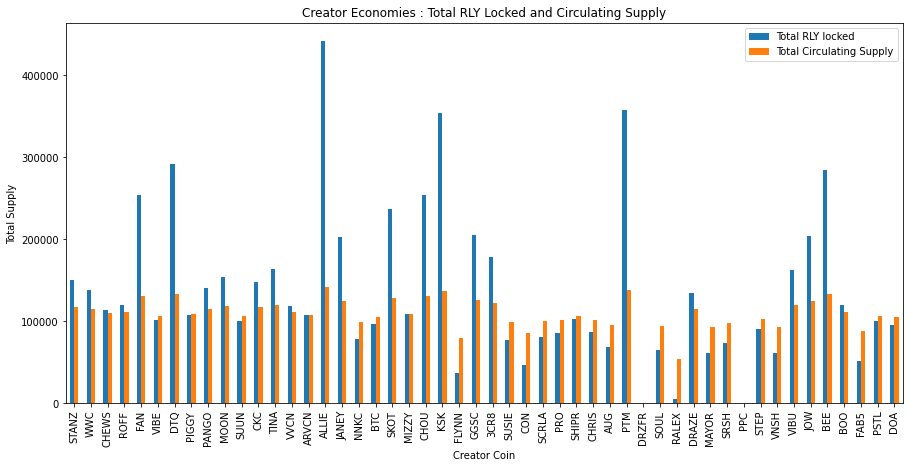

In [19]:
metrics[['Total RLY locked','Total Circulating Supply']].plot(kind="bar",figsize=(15,7),
                                                              xlabel='Creator Coin', ylabel='Total Supply',sort_columns=True,
                                                              title='Creator Economies : Total RLY Locked and Circulating Supply')

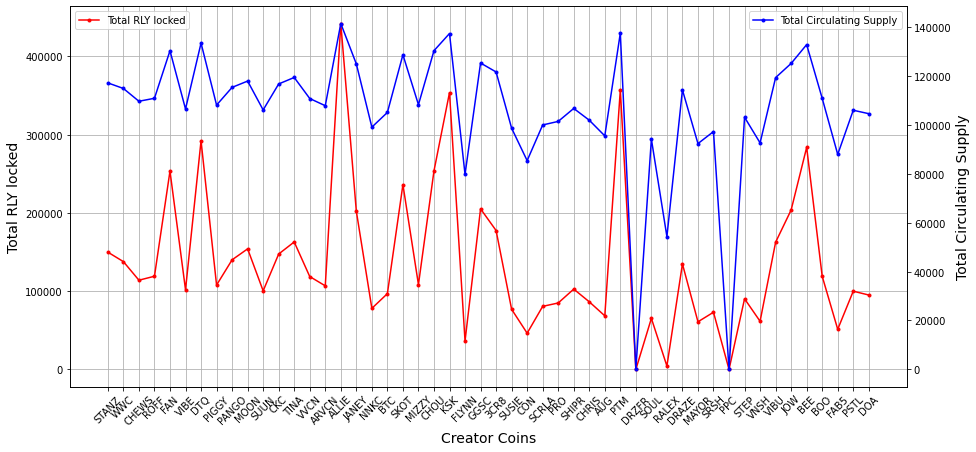

In [20]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)

ax.plot(metrics['id'], metrics['Total RLY locked'], '-r',label="Total RLY locked", marker=".")
ax.set_xlabel("Creator Coins",fontsize=14)
ax.set_ylabel("Total RLY locked",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot(metrics['id'], metrics['Total Circulating Supply'],'-b',label="Total Circulating Supply",marker=".")
ax2.set_ylabel("Total Circulating Supply",fontsize=14)
ax2.legend(loc='upper right')

In [21]:
metrics['Colateralization Ratio'] = metrics['Total RLY locked'] / metrics['Total Circulating Supply']

In [22]:
# fig = metrics[['Colateralization Ratio']].plot(kind="line",figsize=(15,7),
#                                                               xlabel='Creator Coin', ylabel='Collateralization Ratio',
#                                                               title='Creator Economies : Collateralization Ratio\'s of Creator Coins' ).get_figure()

In [23]:
# The total supporters and transactions processed by each creator coin market have
# been directly taken from the Rally website

# It needs to be taken again as the data file has been updated since these values were updated
# supporters = [576,60,156,162,269,90,359,116,29,185,45,123,35,30,40,294,47,66,35,106,104,117,422,0,
#               421,91,43,25,0,95,22,43,47,795,0,57,0,49,98,50,0,257,138,183,339,226,177]

# totalTransactions = [1700,125,429,416,880,181,1700,200,68,691,91,249,130,82,67,984,130,161,85,594,223,363
#                      ,1400,0,1000,432,130,70,0,504,111,122,158,1600,0,216,0,249,326,189,0,847,514,679,849,930,480 ]

# currentPrice = [5.67,5.02,4.37,4.29,14.0,3.6,16.3,3.80,5.08,5.84,3.581,5.50,6.13,4.26,3.85,20.23,8.04,2.73,3.52
#                 ,10.02,3.85,10.64,18.35,0,5.24,6.48,2.90,1.71,0,2.53,2.29,3.09,2.64,14.58,0,2.39,0,4.99,2.86
#                 ,2.67,0,3.73,2.65,4.94,7.50,11.56,3.32]

In [24]:
# copyDF = metrics.copy(deep=True) 

In [25]:
# copyDF['Total Supporters'] = supporters
# copyDF['Total Transactions'] = totalTransactions
# copyDF['Current Price (RLY)'] = currentPrice

# copyDF.drop(['PPC','RALEX','DRZFR','SCRLA','FLYNN'],inplace=True)

# copyDF['Avg. Transactions per supporter'] = copyDF.apply(lambda row: row['Total Transactions']/row['Total Supporters'], axis=1)

In [26]:
# display(copyDF)

In [27]:
# plt.figure(figsize=(18,6))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(copyDF.loc[:,'id'],copyDF.loc[:,'Total Supporters'],label='Total Supporters')
# plt.plot(copyDF.loc[:,'id'],copyDF.loc[:,'Total Transactions'],label='Total Transactions')
# plt.xlabel('Creator Coin')
# plt.ylabel('Number of supporters / transactions')
# plt.title('Creator Economies : Total Supporters / transactions')
# plt.legend()
# # plt.savefig('./images/CCEconomies.png')

In [28]:
# fig,ax = plt.subplots(figsize=(15, 7))
# plt.xticks(rotation=45)
# plt.title('Creator Economies : Total Supporters, total Transactions per CC')

# ax.set_xlabel("Creator Coin",fontsize=14)

# ax.plot(copyDF['id'], copyDF['Total Transactions'], '-r',label="Total Transactions", marker=".")
# ax.set_ylabel("Total Transactions",fontsize=14)
# ax.legend(loc='upper left')
# ax.grid(True)

# ax2=ax.twinx()
# ax2.plot(copyDF['id'], copyDF['Total Supporters'],'-b',label="Total Supporters",marker=".")
# ax2.set_ylabel("Total Supporters",fontsize=14)
# ax2.legend(loc='upper right')

In [29]:
# plt.figure(figsize=(18,6))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(copyDF.loc[:,'id'],copyDF.loc[:,'Avg. Transactions per supporter'],label='Avg. no. of Transactions per Supporter')
# plt.xlabel('Creator Coin')
# plt.ylabel('Number of transactions per Supporter')
# plt.title('Creator Economies : Number of transactions per Supporter')
# plt.legend()
# # plt.savefig('./images/CCEconomies.png')

In [30]:
# plt.figure(figsize=(18,6))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(copyDF.loc[:,'id'],copyDF.loc[:,'Current Price (RLY)'],label='Current Price (RLY)')
# plt.plot(copyDF.loc[:,'id'],copyDF.loc[:,'Avg. Transactions per supporter'],label='Avg. no. of Transactions per Supporter')
# plt.xlabel('Creator Coin')
# plt.title('Creator Economies : Price (RLY), avg. transactions per supporter ')
# plt.legend()
# # plt.savefig('./images/CCEconomies.png')

In [31]:
# fig,ax = plt.subplots(figsize=(15, 7))
# plt.xticks(rotation=45)
# plt.title('Creator Economies : Price (RLY), avg. transactions per supporter')

# ax.set_xlabel("Creator Coin",fontsize=14)

# ax.plot(copyDF['id'], copyDF['Current Price (RLY)'], '-r',label="Current Price (RLY)", marker=".")
# ax.set_ylabel("Current Price (RLY)",fontsize=14)
# ax.legend(loc='upper left')
# ax.grid(True)

# ax2=ax.twinx()
# ax2.plot(copyDF['id'], copyDF['Avg. Transactions per supporter'],'-b',label="Avg. no. of Transactions per Supporter",marker=".")
# ax2.set_ylabel("Avg. Transactions per supporter",fontsize=14)
# ax2.legend(loc='upper right')

In [32]:
coinDF = sideChainDF.loc[ sideChainDF['id'] == 'COIN']
stanzDF = sideChainDF.loc[ sideChainDF['id'] == 'STANZ']
wwcDF = sideChainDF.loc[ sideChainDF['id'] == 'WWC']
chewsDF = sideChainDF.loc[ sideChainDF['id'] == 'CHEWS']
fanDF = sideChainDF.loc[ sideChainDF['id'] == 'FAN']
vibeDF = sideChainDF.loc[ sideChainDF['id'] == 'VIBE']

dtqDF = sideChainDF.loc[ sideChainDF['id'] == 'DTQ']
piggyDF = sideChainDF.loc[ sideChainDF['id'] == 'PIGGY']
pangoDF = sideChainDF.loc[ sideChainDF['id'] == 'PANGO']
moonDF = sideChainDF.loc[ sideChainDF['id'] == 'MOON']
suunDF = sideChainDF.loc[ sideChainDF['id'] == 'SUUN']
ckcDF = sideChainDF.loc[ sideChainDF['id'] == 'CKC']
tinaDF = sideChainDF.loc[ sideChainDF['id'] == 'TINA']
vvcnDF = sideChainDF.loc[ sideChainDF['id'] == 'VVCN']

arvcnDF = sideChainDF.loc[ sideChainDF['id'] == 'ARVCN']
allieDF = sideChainDF.loc[ sideChainDF['id'] == 'ALLIE']
janeyDF = sideChainDF.loc[ sideChainDF['id'] == 'JANEY']
nnkcDF = sideChainDF.loc[ sideChainDF['id'] == 'NNKC']


btcDF = sideChainDF.loc[ sideChainDF['id'] == 'BTC']
skotDF = sideChainDF.loc[ sideChainDF['id'] == 'SKOT']
mizzyDF = sideChainDF.loc[ sideChainDF['id'] == 'MIZZY']
chouDF = sideChainDF.loc[ sideChainDF['id'] == 'CHOU']
kskDF = sideChainDF.loc[ sideChainDF['id'] == 'KSK']
flynnDF = sideChainDF.loc[ sideChainDF['id'] == 'FLYNN']
ggscDF = sideChainDF.loc[ sideChainDF['id'] == 'GGSC']
_3cr8DF = sideChainDF.loc[ sideChainDF['id'] == '3CR8']

susieDF = sideChainDF.loc[ sideChainDF['id'] == 'SUSIE']
conDF = sideChainDF.loc[ sideChainDF['id'] == 'CON']
scrlaDF = sideChainDF.loc[ sideChainDF['id'] == 'SCRLA']
proDF = sideChainDF.loc[ sideChainDF['id'] == 'PRO']
shiprDF = sideChainDF.loc[ sideChainDF['id'] == 'SHIPR']
chrisDF = sideChainDF.loc[ sideChainDF['id'] == 'CHRIS']

augDF = sideChainDF.loc[ sideChainDF['id'] == 'AUG']
ptmDF = sideChainDF.loc[ sideChainDF['id'] == 'PTM']
drzfrDF = sideChainDF.loc[ sideChainDF['id'] == 'DRZFR']
soulDF = sideChainDF.loc[ sideChainDF['id'] == 'SOUL']
ralexDF = sideChainDF.loc[ sideChainDF['id'] == 'RALEX']
drazeDF = sideChainDF.loc[ sideChainDF['id'] == 'DRAZE']
mayorDF = sideChainDF.loc[ sideChainDF['id'] == 'MAYOR']

srshDF = sideChainDF.loc[ sideChainDF['id'] == 'SRSH']
ppcDF = sideChainDF.loc[ sideChainDF['id'] == 'PPC']
stepDF = sideChainDF.loc[ sideChainDF['id'] == 'STEP']
vnshDF = sideChainDF.loc[ sideChainDF['id'] == 'VNSH']
vibuDF = sideChainDF.loc[ sideChainDF['id'] == 'VIBU']
jowDF = sideChainDF.loc[ sideChainDF['id'] == 'JOW']
beeDF = sideChainDF.loc[ sideChainDF['id'] == 'BEE']
booDF = sideChainDF.loc[ sideChainDF['id'] == 'BOO']

_57_DF = sideChainDF.loc[ sideChainDF['id'] == '57']
_58_DF = sideChainDF.loc[ sideChainDF['id'] == '58']
_59_DF = sideChainDF.loc[ sideChainDF['id'] == '59']
_60_DF = sideChainDF.loc[ sideChainDF['id'] == '60']
_61_DF = sideChainDF.loc[ sideChainDF['id'] == '61']
_62_DF = sideChainDF.loc[ sideChainDF['id'] == '62']
_63_DF = sideChainDF.loc[ sideChainDF['id'] == '63']
_64_DF = sideChainDF.loc[ sideChainDF['id'] == '64']
_65_DF = sideChainDF.loc[ sideChainDF['id'] == '65']

testA_DF = sideChainDF.loc[ sideChainDF['id'] == 'TESTA']
testB_DF = sideChainDF.loc[ sideChainDF['id'] == 'TESTB']
testC_DF = sideChainDF.loc[ sideChainDF['id'] == 'TESTC']
testD_DF = sideChainDF.loc[ sideChainDF['id'] == 'TESTD']
testE_DF = sideChainDF.loc[ sideChainDF['id'] == 'TESTE']
testF_DF = sideChainDF.loc[ sideChainDF['id'] == 'TESTF']
testG_DF = sideChainDF.loc[ sideChainDF['id'] == 'TESTG']

In [33]:
def getPrice(row): 
    if row['Supply Change'] == 0:
        return 0
    price = row['Delta RLY'] / row['Supply Change']
    if price < 0:
        return -1*price
    return price

### $STANZ Creator Coin
Rally dashboard link - [https://rally.io/creator/STANZ/](https://rally.io/creator/STANZ/) <br>
Twitch link - [https://www.twitch.tv/stanz](https://www.twitch.tv/stanz) : 44.1K followers <br>
Twitter link - [https://twitter.com/NathanStanz](https://twitter.com/NathanStanz) : 13.6K followers <br>
YouTube link - [https://www.youtube.com/stanz](https://www.youtube.com/stanz) : 29.8K subscribers
        

- Total RLY backing - 206.1K
- Total $STANZ - 125.3K

- Total Supporters - 510 (total A/cs that transacted in $Stanz)
- Total transactions - 957

In [34]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(stanzDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [35]:
%matplotlib inline
# %matplotlib notebook

In [36]:
stanzDF.head(1)

from     id  \
45  0x0000000000000000000000000000000000000000  STANZ   

                                      to  value                  GMT  \
45  a4db5001-6f5a-4f6a-888a-07eada1ba985    0.0  2020-07-20 22:54:40   

    Supply Change  Total Circulating Supply  Total Circulating Supply (Prev.)  \
45            0.0                       0.0                               0.0   

    Total RLY locked  Total RLY locked (Prev)  Delta RLY  USD/Rally Mean  
45               0.0                      0.0        0.0           0.033

In [37]:
period_min = 3
period_max = 1563
period_init = 1563

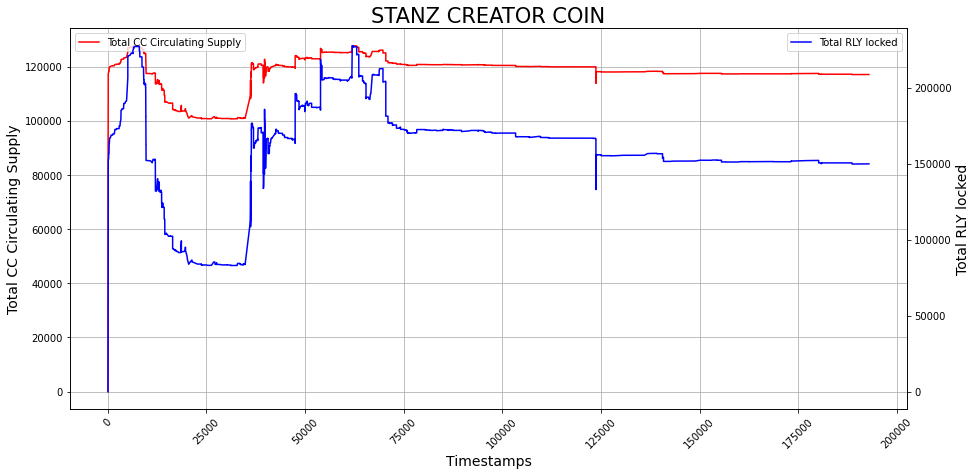

In [38]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('STANZ CREATOR COIN', fontsize=21)

ax.plot(stanzDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( stanzDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-39-f6998c854e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stanzDF['Price (in RLY)'] = stanzDF.apply(lambda row: getPrice(row), axis = 1 )


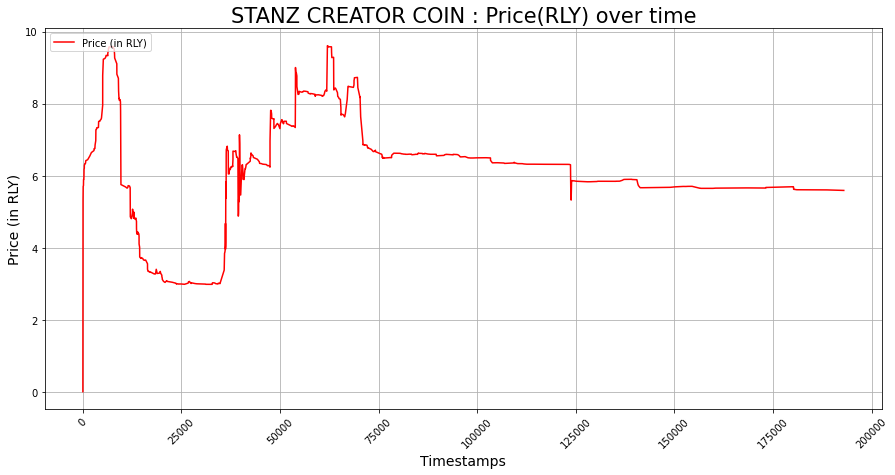

<Figure size 792x648 with 0 Axes>

In [39]:
stanzDF['Price (in RLY)'] = stanzDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('STANZ CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(stanzDF[stanzDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $WWC Creator Coin
Rally dashboard link - [https://rally.io/creator/WWC/](https://rally.io/creator/WWC/) <br>
Twitch link - [https://www.twitch.tv/wobbleweezy](https://www.twitch.tv/wobbleweezy) : 25.7K followers <br>
Twitter link - [https://twitter.com/wobbleweezy/](https://twitter.com/wobbleweezy/) : 617 followers <br>
YouTube link - [https://www.youtube.com/channel/UC0-Ujc5pzcV2N0Zit1aKi4Q](https://www.youtube.com/channel/UC0-Ujc5pzcV2N0Zit1aKi4Q) : 749 subscribers
        

- Total RLY backing - 138.8K
- Total $WWC - 115K

- Total Supporters - 54 (total A/cs that transacted in $WWC)
- Total transactions - 81

In [40]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(wwcDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [41]:
period_min = 3
period_max = len(wwcDF)
period_init = len(wwcDF)

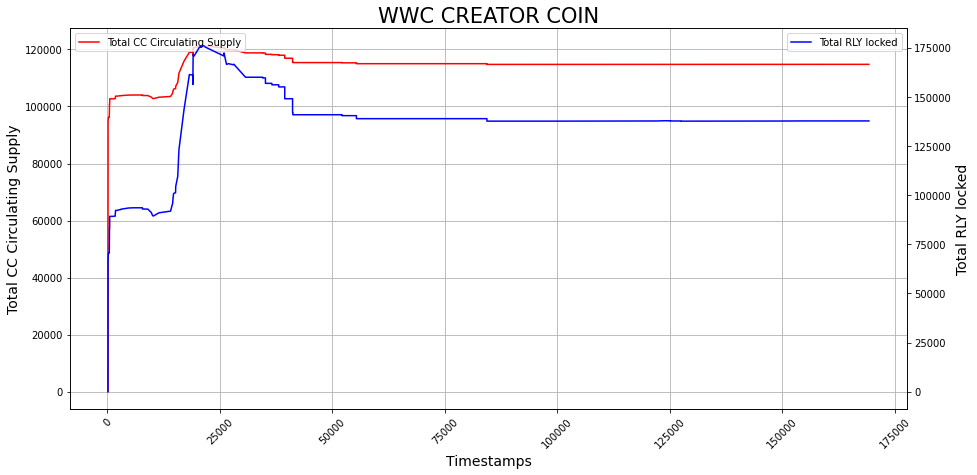

In [42]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('WWC CREATOR COIN', fontsize=21)

ax.plot(wwcDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( wwcDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-43-2e790f75d611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wwcDF['Price (in RLY)'] = wwcDF.apply(lambda row: getPrice(row), axis = 1 )


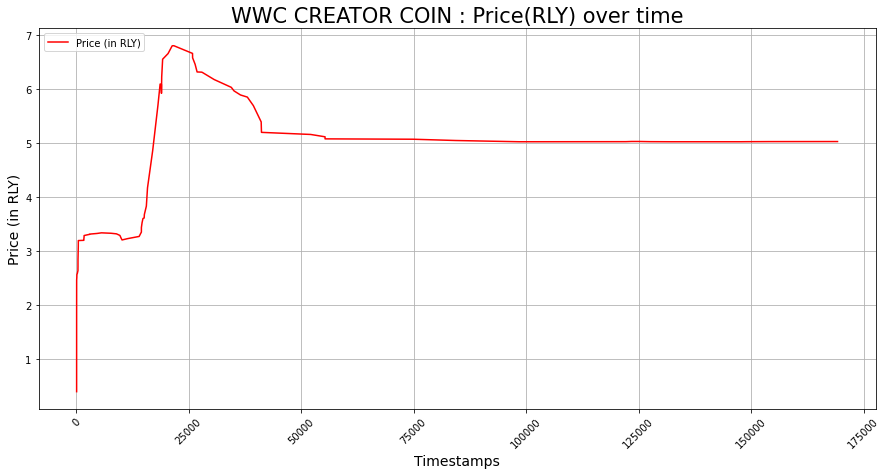

<Figure size 792x648 with 0 Axes>

In [43]:
wwcDF['Price (in RLY)'] = wwcDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('WWC CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(wwcDF[wwcDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $CHEWS Creator Coin
Rally dashboard link - [https://rally.io/creator/CHEWS/](https://rally.io/creator/CHEWS/) <br>
Twitch link - [https://www.twitch.tv/chewiemelodies](https://www.twitch.tv/chewiemelodies) : 81K followers <br>
Twitter link - [https://twitter.com/chewiemelodies/](https://twitter.com/chewiemelodies/) : 2174 followers <br>
YouTube link - [https://www.youtube.com/c/chewiemelodies](https://www.youtube.com/c/chewiemelodies) : 13.3K subscribers
        

- Total RLY backing - 107,904
- Total $CHEWS - 108K

- Total Supporters - 127 (total A/cs that transacted in $Stanz)
- Total transactions - 167

In [44]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(chewsDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [45]:
period_min = 3
period_max = len(chewsDF)
period_init = len(chewsDF)

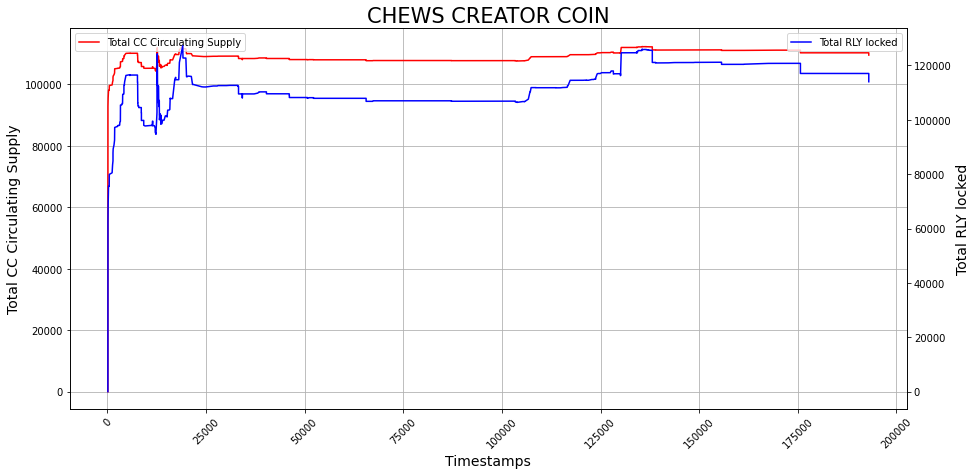

In [46]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CHEWS CREATOR COIN', fontsize=21)

ax.plot(chewsDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( chewsDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-47-08f605ee40c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chewsDF['Price (in RLY)'] = chewsDF.apply(lambda row: getPrice(row), axis = 1 )


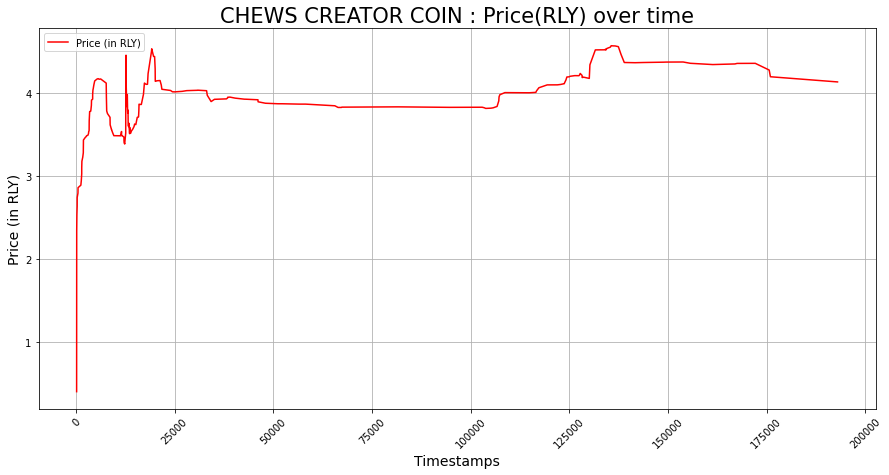

<Figure size 792x648 with 0 Axes>

In [47]:
chewsDF['Price (in RLY)'] = chewsDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CHEWS CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(chewsDF[chewsDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $FAN Creator Coin
Rally dashboard link - [https://rally.io/creator/FAN/](https://rally.io/creator/FAN/) <br>
Twitch link - [https://www.twitch.tv/fanhots](https://www.twitch.tv/fanhots) : 72.9K followers <br>
Twitter link - [https://twitter.com/FanHOTS](https://twitter.com/FanHOTS) : 7,188 followers <br>
YouTube link - [https://www.youtube.com/c/fanheroesofthestorm](https://www.youtube.com/c/fanheroesofthestorm) : 46.2K subscribers
        

- Total RLY backing - 367.2K
- Total $FAN - 137.9K

- Total Supporters - 242 (total A/cs that transacted in $FAN)
- Total transactions - 499

In [48]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(fanDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [49]:
period_min = 3
period_max = len(fanDF)
period_init = len(fanDF)

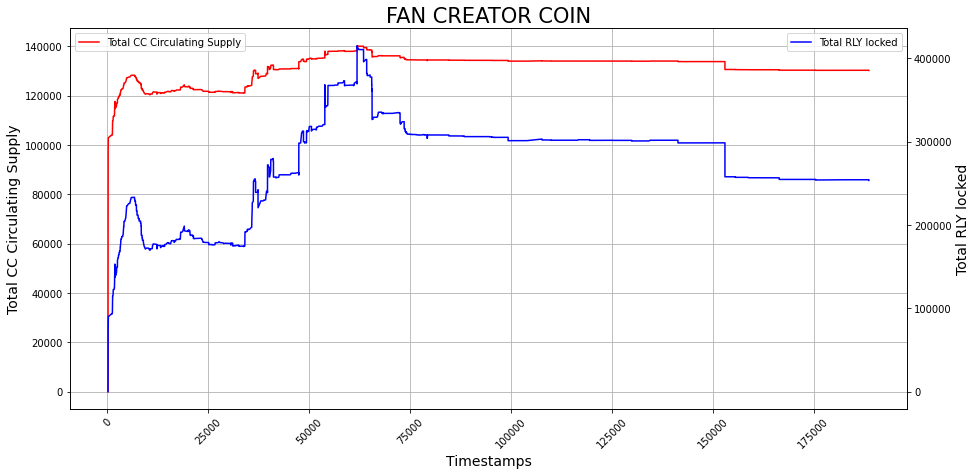

In [50]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('FAN CREATOR COIN', fontsize=21)

ax.plot(fanDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( fanDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')


<ipython-input-51-16ba3bc0f38b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fanDF['Price (in RLY)'] = fanDF.apply(lambda row: getPrice(row), axis = 1 )


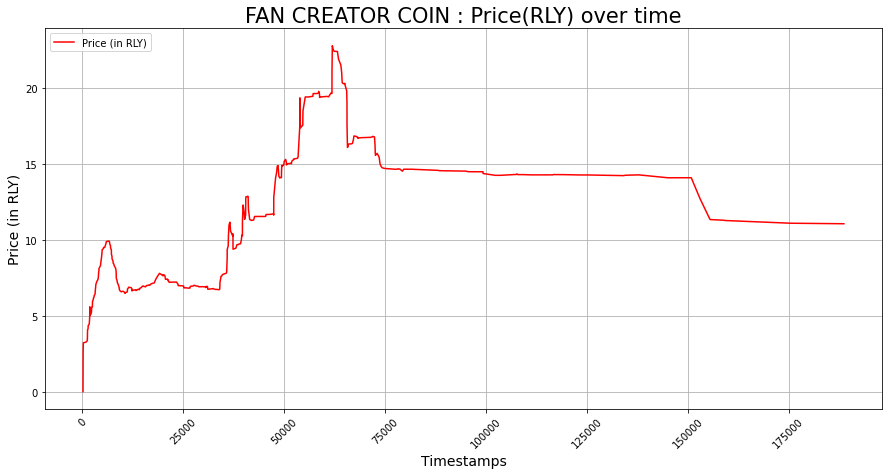

<Figure size 792x648 with 0 Axes>

In [51]:
fanDF['Price (in RLY)'] = fanDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('FAN CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(fanDF[fanDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $VIBE Creator Coin
Rally dashboard link - [https://rally.io/creator/VIBE/](https://rally.io/creator/VIBE/) <br>
Twitch link - [https://www.twitch.tv/keeyuh](https://www.twitch.tv/keeyuh) : 73.8K followers <br>
YouTube link - [https://www.youtube.com/c/KeeyuhM](https://www.youtube.com/c/KeeyuhM) : 250K subscribers
        

- Total RLY backing - 95.9K
- Total $VIBE - 104.7K

- Total Supporters - 79 (total A/cs that transacted in $VIBE)
- Total transactions - 81

In [52]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(vibeDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [53]:
period_min = 3
period_max = len(vibeDF)
period_init = len(vibeDF)

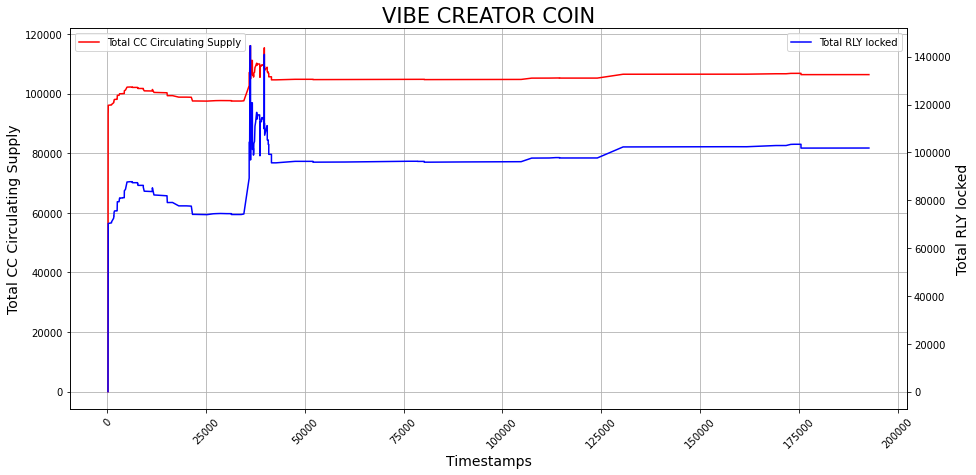

In [54]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('VIBE CREATOR COIN', fontsize=21)

ax.plot(vibeDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( vibeDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-55-5e1c4d7c5588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vibeDF['Price (in RLY)'] = vibeDF.apply(lambda row: getPrice(row), axis = 1 )


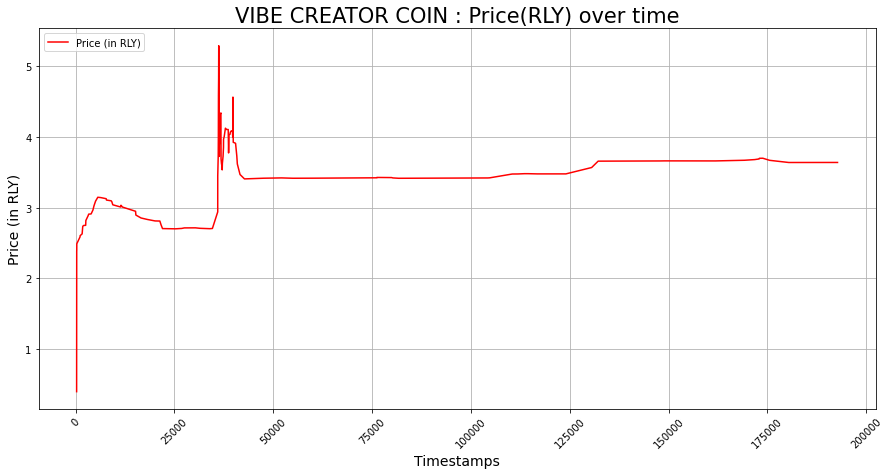

<Figure size 792x648 with 0 Axes>

In [55]:
vibeDF['Price (in RLY)'] = vibeDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('VIBE CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(vibeDF[vibeDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $DTQ Creator Coin
Rally dashboard link - [https://rally.io/creator/DTQ/](https://rally.io/creator/DTQ/) <br>
Twitch link - [https://www.twitch.tv/downtoquest](https://www.twitch.tv/downtoquest) : 84.2K followers <br>
YouTube link - [https://www.youtube.com/c/DownToQuest](https://www.youtube.com/c/DownToQuest) : 5.91K subscribers
Twitter link - [https://twitter.com/downtoquest](https://twitter.com/downtoquest) : 6,982 followers <br>        

- Total RLY backing - 329.7K
- Total $DTQ - 135.8K

- Total Supporters - 283 (total A/cs that transacted in $DTQ)
- Total transactions - 842

In [56]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(dtqDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [57]:
period_min = 3
period_max = len(dtqDF)
period_init = len(dtqDF)

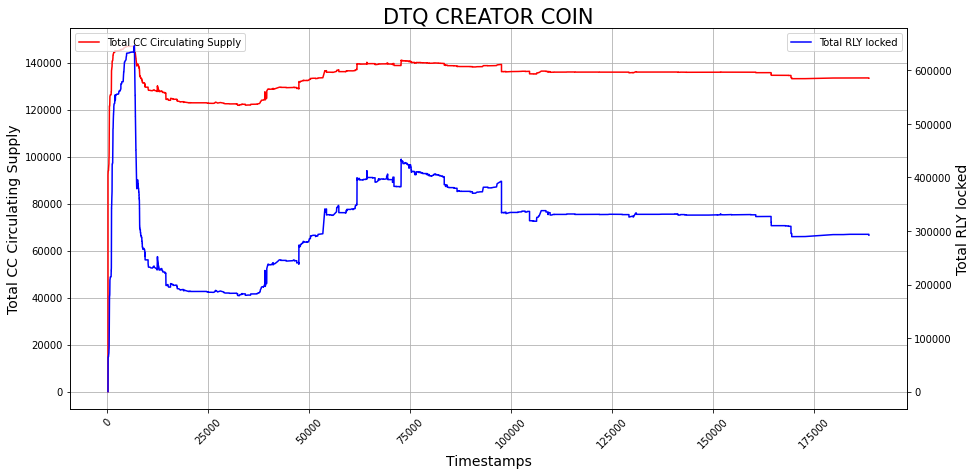

In [58]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('DTQ CREATOR COIN', fontsize=21)

ax.plot(dtqDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( dtqDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-59-896d24494cdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtqDF['Price (in RLY)'] = dtqDF.apply(lambda row: getPrice(row), axis = 1 )


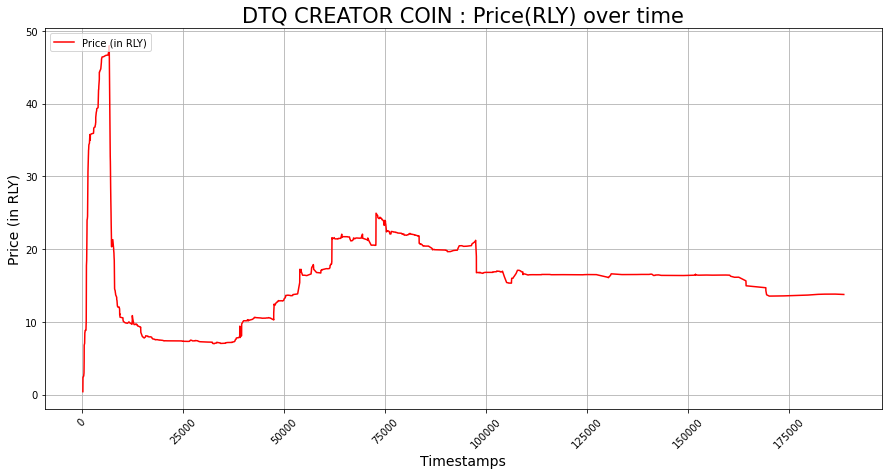

<Figure size 792x648 with 0 Axes>

In [59]:
dtqDF['Price (in RLY)'] = dtqDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('DTQ CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(dtqDF[dtqDF['Price (in RLY)']>0]['Price (in RLY)'],  '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $PIGGY Creator Coin
Rally dashboard link - [https://rally.io/creator/PIGGY/](https://rally.io/creator/PIGGY/) <br>
Twitch link - [https://www.twitch.tv/twlevewinshs](https://www.twitch.tv/twlevewinshs) : 60.3K followers <br>
Twitter link - [https://twitter.com/f2k_victor](https://twitter.com/f2k_victor) : 2412 followers <br>        

- Total RLY backing - 119.4K
- Total $PIGGY - 110.8K

- Total Supporters - 98 (total A/cs that transacted in $PIGGY)
- Total transactions - 110

In [60]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(piggyDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [61]:
period_min = 3
period_max = len(piggyDF)
period_init = len(piggyDF)

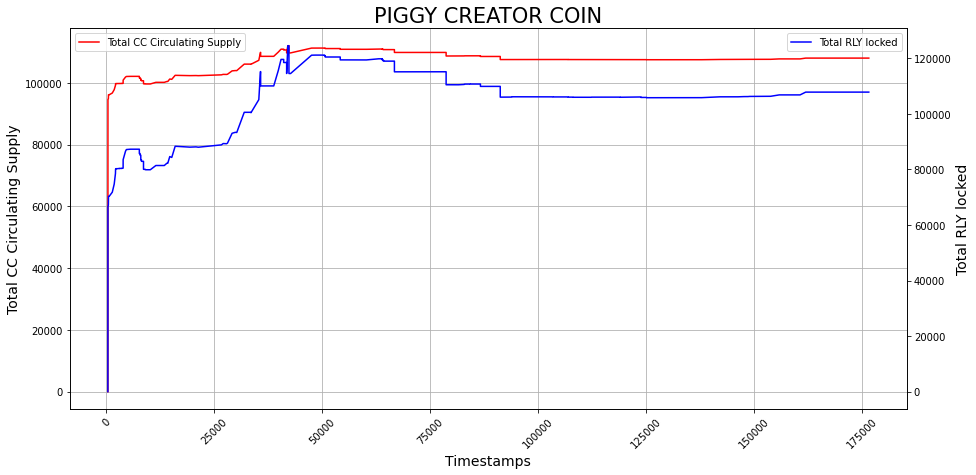

In [62]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('PIGGY CREATOR COIN', fontsize=21)

ax.plot(piggyDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( piggyDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-63-627326978154>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piggyDF['Price (in RLY)'] = piggyDF.apply(lambda row: getPrice(row), axis = 1 )


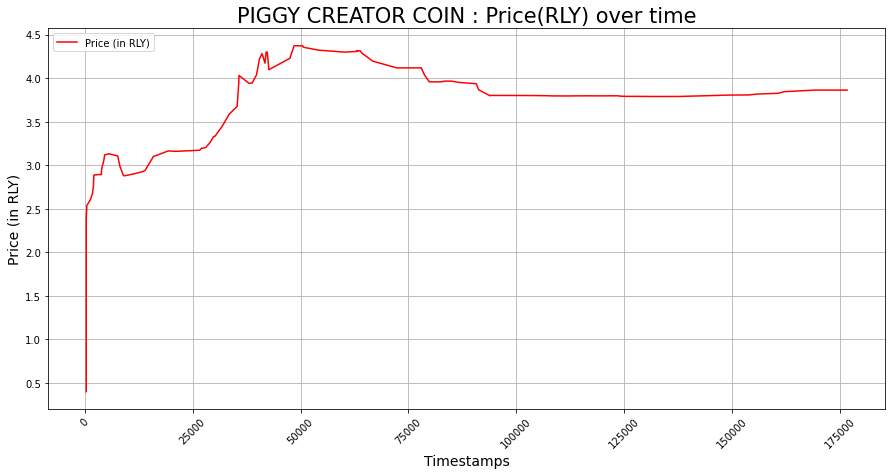

<Figure size 792x648 with 0 Axes>

In [63]:
piggyDF['Price (in RLY)'] = piggyDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('PIGGY CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(piggyDF[piggyDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $PANGO Creator Coin
Rally dashboard link - [https://rally.io/creator/PANGO/](https://rally.io/creator/PANGO/) <br>
Twitch link - [https://www.twitch.tv/lukiluki](https://www.twitch.tv/lukiluki) : 49.7K  followers <br>

- Total RLY backing - 103.2K
- Total $PANGO - 106.7K

- Total Supporters - 17 (total A/cs that transacted in $PANGO)
- Total transactions - 20

In [64]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(pangoDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [65]:
period_min = 3
period_max = len(pangoDF)
period_init = len(pangoDF)

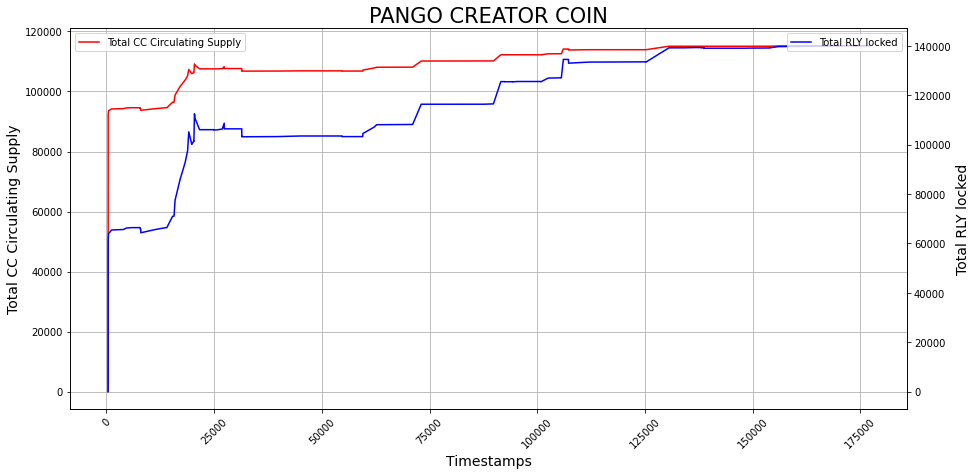

In [66]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('PANGO CREATOR COIN', fontsize=21)

ax.plot(pangoDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( pangoDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-67-556311d1ff80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pangoDF['Price (in RLY)'] = pangoDF.apply(lambda row: getPrice(row), axis = 1 )


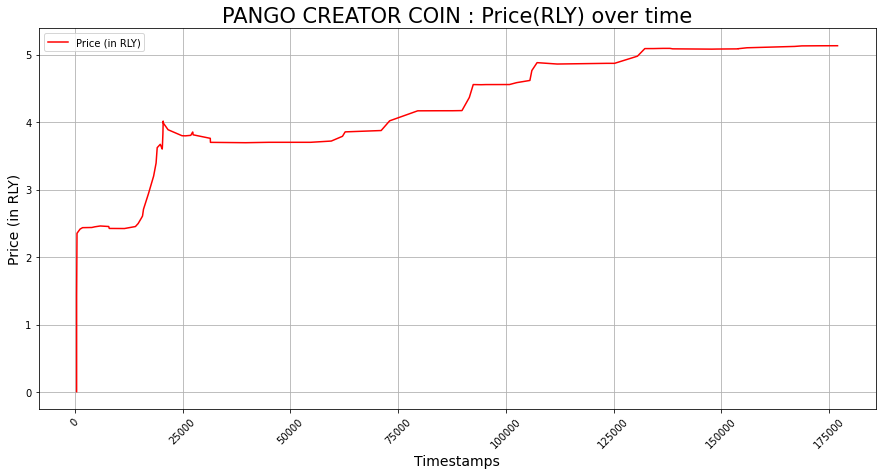

<Figure size 792x648 with 0 Axes>

In [67]:
pangoDF['Price (in RLY)'] = pangoDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('PANGO CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(pangoDF[pangoDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $MOON Creator Coin
Rally dashboard link - [https://rally.io/creator/MOON/](https://rally.io/creator/MOON/) <br>
Twitch link - [https://www.twitch.tv/nicholena](https://www.twitch.tv/nicholena) : 41.9K  followers <br>

- Total RLY backing - 275.2K
- Total $MOON - 132K

- Total Supporters - 115 (total A/cs that transacted in $MOON)
- Total transactions - 232

In [68]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(moonDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [69]:
period_min = 3
period_max = len(moonDF)
period_init = len(moonDF)

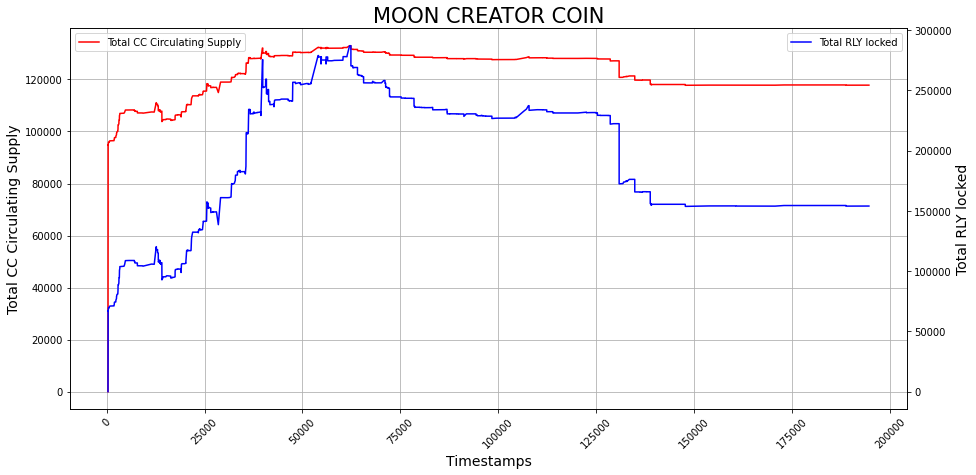

In [70]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('MOON CREATOR COIN', fontsize=21)

ax.plot(moonDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( moonDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')


<ipython-input-71-3bd9ca32512f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moonDF['Price (in RLY)'] = moonDF.apply(lambda row: getPrice(row), axis = 1 )


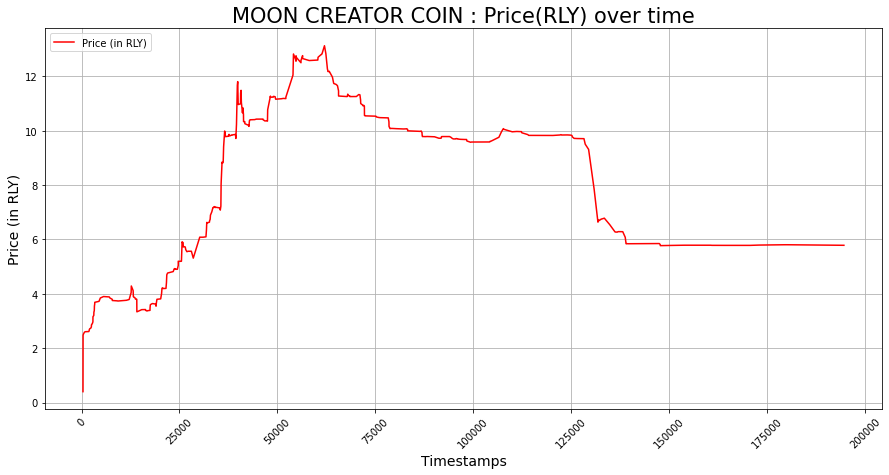

<Figure size 792x648 with 0 Axes>

In [71]:
moonDF['Price (in RLY)'] = moonDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('MOON CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(moonDF[moonDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $SUUN Creator Coin
Rally dashboard link - [https://rally.io/creator/SUUN/](https://rally.io/creator/SUUN/) <br>
Twitch link - [https://www.twitch.tv/maddie](https://www.twitch.tv/maddie) : 15.4K  followers <br>

- Total RLY backing - 107.3K
- Total $SUUN - 107.8K

- Total Supporters - 39 (total A/cs that transacted in $SUUN)
- Total transactions - 50

In [72]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(suunDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [73]:
period_min = 3
period_max = len(suunDF)
period_init = len(suunDF)

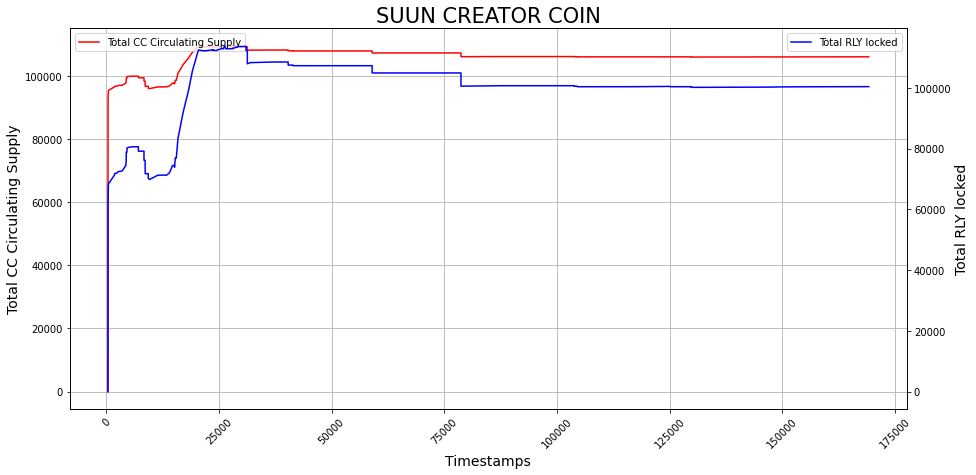

In [74]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SUUN CREATOR COIN', fontsize=21)

ax.plot(suunDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( suunDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-75-b4fea361ae8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suunDF['Price (in RLY)'] = suunDF.apply(lambda row: getPrice(row), axis = 1 )


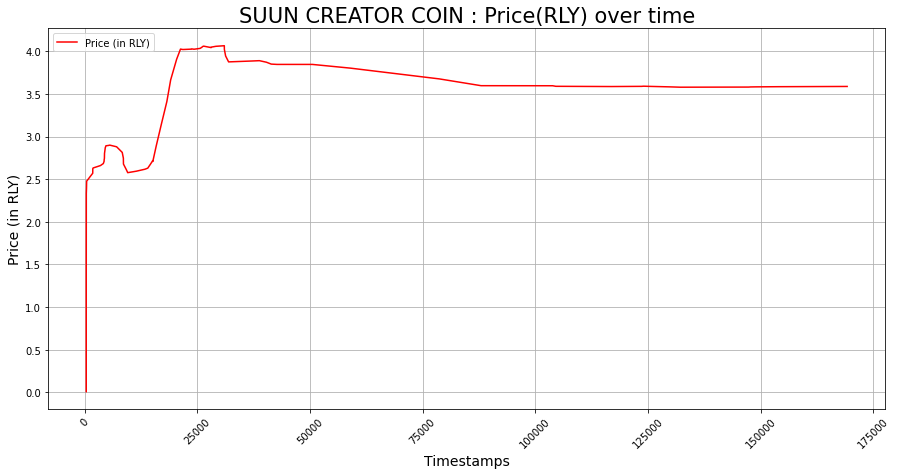

<Figure size 792x648 with 0 Axes>

In [75]:
suunDF['Price (in RLY)'] = suunDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SUUN CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(suunDF[suunDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $CKC Creator Coin
Rally dashboard link - [https://rally.io/creator/CKC/](https://rally.io/creator/CKC/) <br>
Twitch link - [https://www.twitch.tv/carmen](https://www.twitch.tv/carmen) : 141K  followers <br>

- Total RLY backing - 138.5K
- Total $CKC - 114.9K

- Total Supporters - 109 (total A/cs that transacted in $CKC)
- Total transactions - 118

In [76]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(ckcDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [77]:
period_min = 3
period_max = len(ckcDF)
period_init = len(ckcDF)

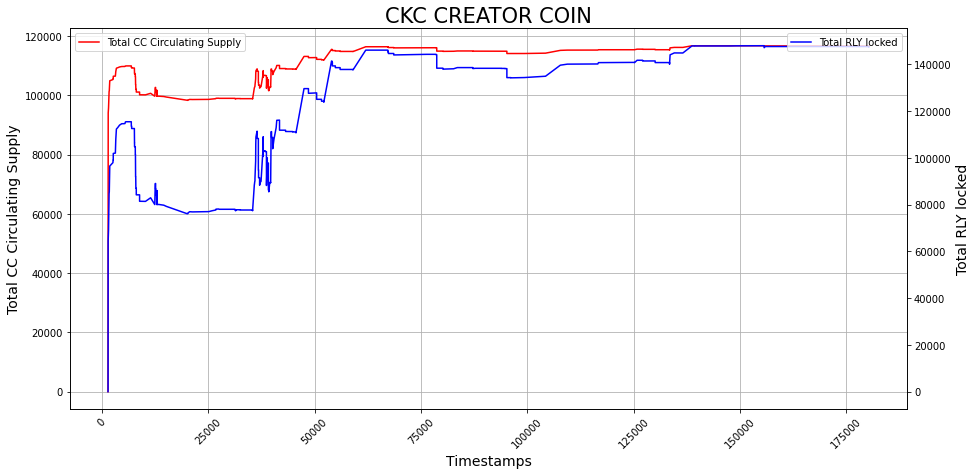

In [78]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CKC CREATOR COIN', fontsize=21)

ax.plot(ckcDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( ckcDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-79-a0ccec34a28d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ckcDF['Price (in RLY)'] = ckcDF.apply(lambda row: getPrice(row), axis = 1 )


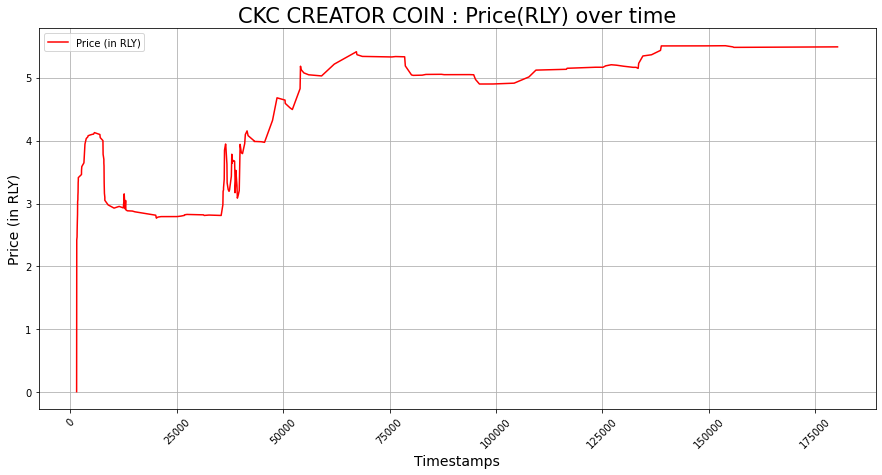

<Figure size 792x648 with 0 Axes>

In [79]:
ckcDF['Price (in RLY)'] = ckcDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CKC CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(ckcDF[ckcDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $TINA Creator Coin
Rally dashboard link - [https://rally.io/creator/TINA/](https://rally.io/creator/TINA/) <br>
Twitch link - [https://www.twitch.tv/tina](https://www.twitch.tv/tina) : 15.9K  followers <br>

- Total RLY backing - 166.4K
- Total $TINA - 119.8K

- Total Supporters - 26 (total A/cs that transacted in $TINA)
- Total transactions - 30

In [80]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(tinaDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [81]:
period_min = 3
period_max = len(tinaDF)
period_init = len(tinaDF)

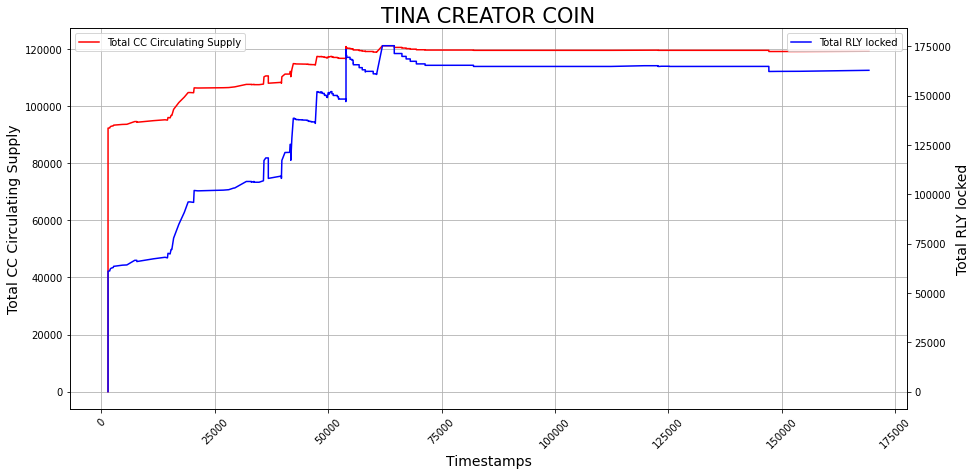

In [82]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('TINA CREATOR COIN', fontsize=21)

ax.plot(tinaDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( tinaDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-83-b1aab10969a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tinaDF['Price (in RLY)'] = tinaDF.apply(lambda row: getPrice(row), axis = 1 )


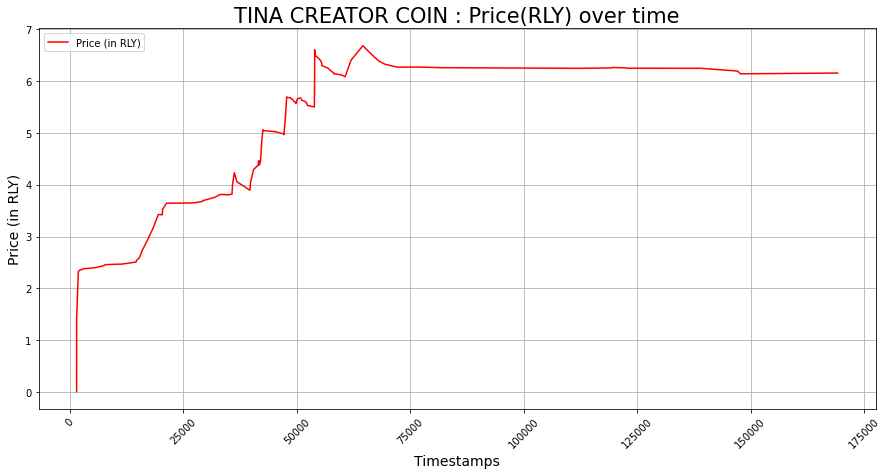

<Figure size 792x648 with 0 Axes>

In [83]:
tinaDF['Price (in RLY)'] = tinaDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('TINA CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(tinaDF[tinaDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $VVCN Creator Coin
Rally dashboard link - [https://rally.io/creator/VVCN/](https://rally.io/creator/VVCN/) <br>
Twitch link - [https://www.twitch.tv/viviana](https://www.twitch.tv/viviana) : 53.3K  followers <br>

- Total RLY backing - 116.3K
- Total $VVCN - 110.1K

- Total Supporters - 22 (total A/cs that transacted in $VVCN)
- Total transactions - 22

In [84]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(vvcnDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [85]:
period_min = 3
period_max = len(vvcnDF)
period_init = len(vvcnDF)

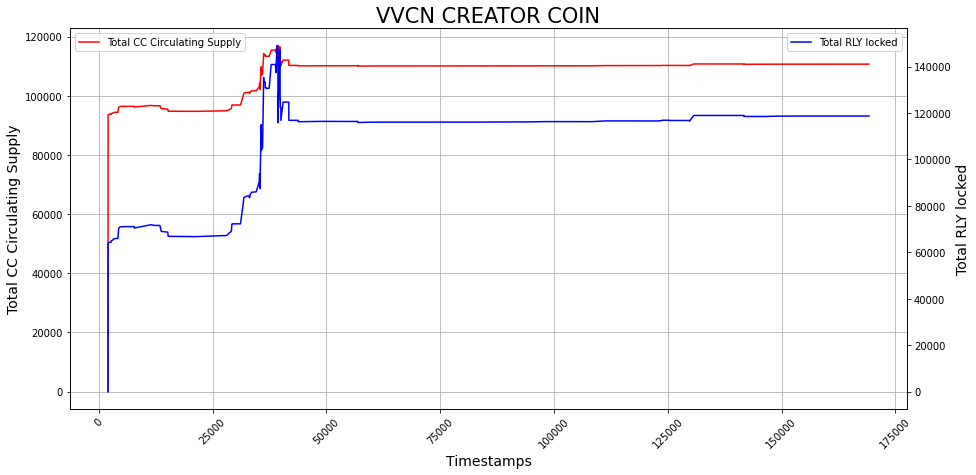

In [86]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('VVCN CREATOR COIN', fontsize=21)

ax.plot(vvcnDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( vvcnDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-87-4953b3954a75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vvcnDF['Price (in RLY)'] = vvcnDF.apply(lambda row: getPrice(row), axis = 1 )


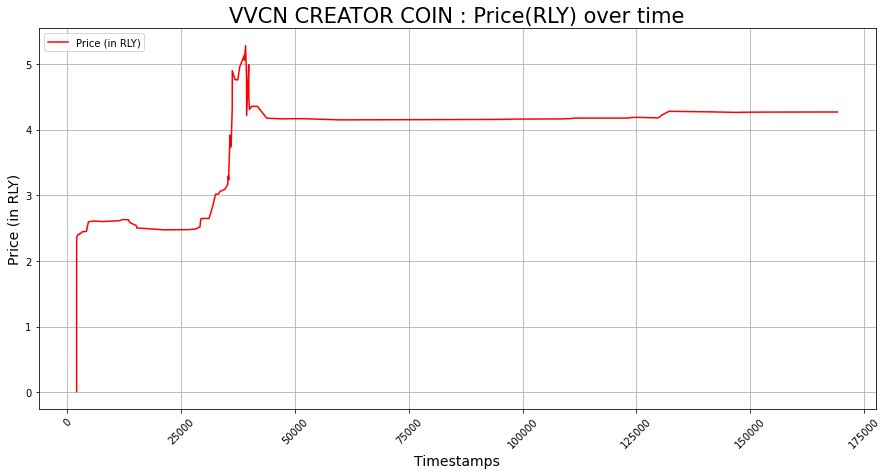

<Figure size 792x648 with 0 Axes>

In [87]:
vvcnDF['Price (in RLY)'] = vvcnDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('VVCN CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(vvcnDF[vvcnDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $ARVCN Creator Coin
Rally dashboard link - [https://rally.io/creator/ARVCN/](https://rally.io/creator/ARVCN/) <br>
Twitch link - [https://www.twitch.tv/arvius](https://www.twitch.tv/arvius) : 47.7K  followers <br>

- Total RLY backing - 69.9K
- Total $ARVCN - 95.9K

- Total Supporters - 31 (total A/cs that transacted in $ARVCN)
- Total transactions - 41

In [88]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(arvcnDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [89]:
period_min = 3
period_max = len(arvcnDF)
period_init = len(arvcnDF)

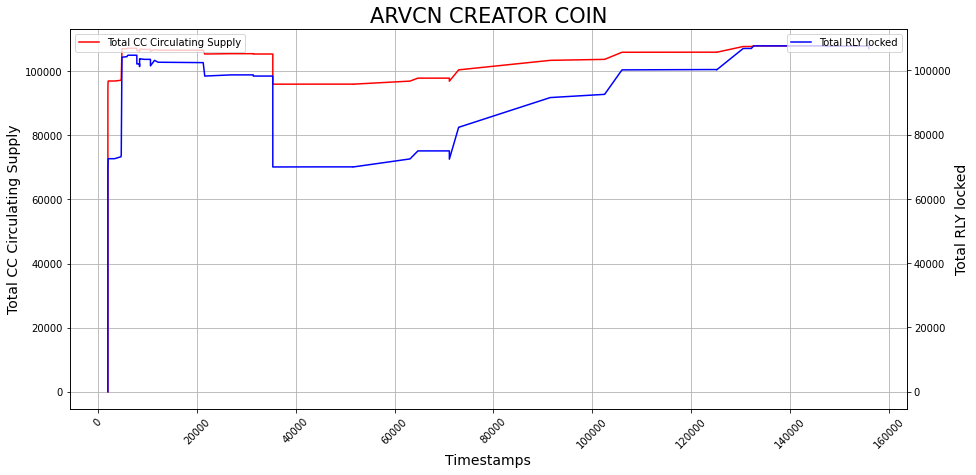

In [90]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('ARVCN CREATOR COIN', fontsize=21)

ax.plot(arvcnDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( arvcnDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-91-41004f6ed391>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arvcnDF['Price (in RLY)'] = arvcnDF.apply(lambda row: getPrice(row), axis = 1 )


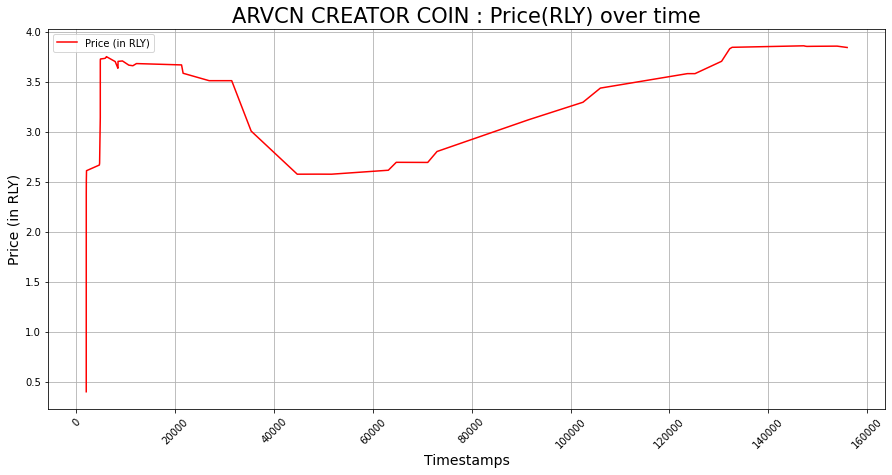

<Figure size 792x648 with 0 Axes>

In [91]:
arvcnDF['Price (in RLY)'] = arvcnDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('ARVCN CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(arvcnDF[arvcnDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $ALLIE Creator Coin
Rally dashboard link - [https://rally.io/creator/ALLIE/](https://rally.io/creator/ALLIE/) <br>
Twitch link - [https://www.twitch.tv/alliestrasza](https://www.twitch.tv/alliestrasza) : 218K followers <br>

- Total RLY backing - 287.9K
- Total $ALLIE - 133K

- Total Supporters - 204 (total A/cs that transacted in $ALLIE)
- Total transactions - 286

In [92]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(allieDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [93]:
period_min = 3
period_max = len(allieDF)
period_init = len(allieDF)

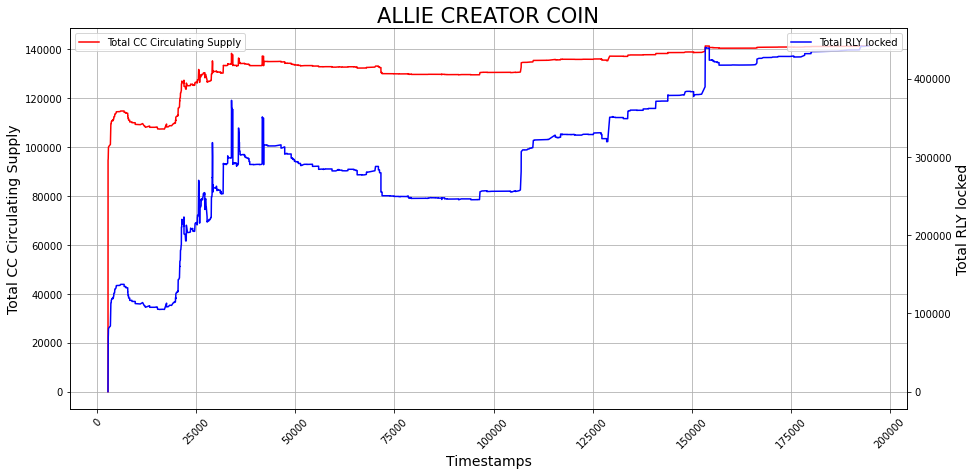

In [94]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('ALLIE CREATOR COIN', fontsize=21)

ax.plot(allieDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( allieDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-95-b5605ffcb693>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allieDF['Price (in RLY)'] = allieDF.apply(lambda row: getPrice(row), axis = 1 )


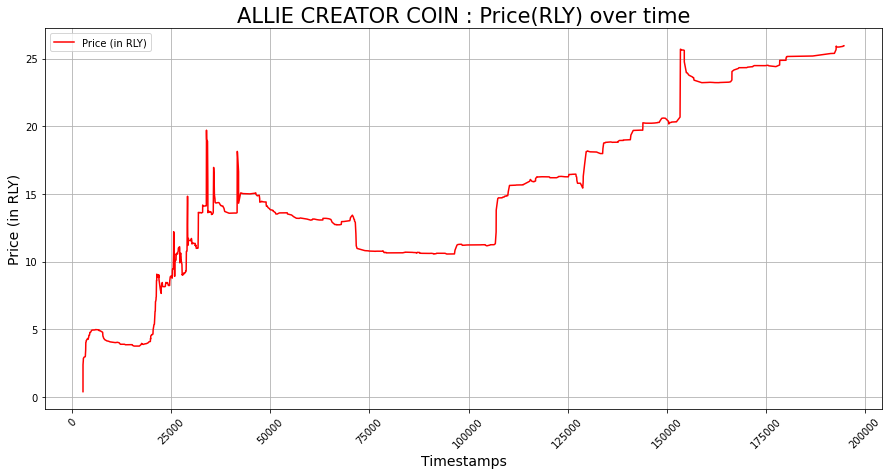

<Figure size 792x648 with 0 Axes>

In [95]:
allieDF['Price (in RLY)'] = allieDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('ALLIE CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(allieDF[allieDF['Price (in RLY)']>0]['Price (in RLY)'],  '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

In [96]:
allieDF['Price (in RLY)'].tail(3)

194616     0.000000
194732    25.946069
194736     0.000000
Name: Price (in RLY), dtype: float64

### $JANEY Creator Coin
Rally dashboard link - [https://rally.io/creator/JANEY/](https://rally.io/creator/JANEY/) <br>
Twitch link - [https://www.twitch.tv/jane](https://www.twitch.tv/jane) : 53.3K  followers <br>

- Total RLY backing - 194.4K
- Total $JANEY - 123.8K

- Total Supporters - 25 (total A/cs that transacted in $JANEY)
- Total transactions - 29

In [97]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(janeyDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [98]:
period_min = 3
period_max = len(janeyDF)
period_init = len(janeyDF)

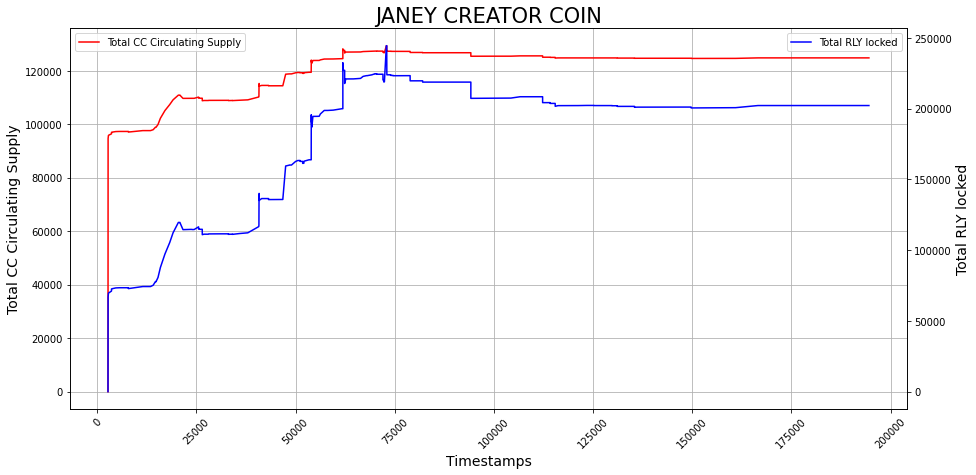

In [99]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('JANEY CREATOR COIN', fontsize=21)

ax.plot(janeyDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( janeyDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-100-74664aaa1c42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  janeyDF['Price (in RLY)'] = janeyDF.apply(lambda row: getPrice(row), axis = 1 )


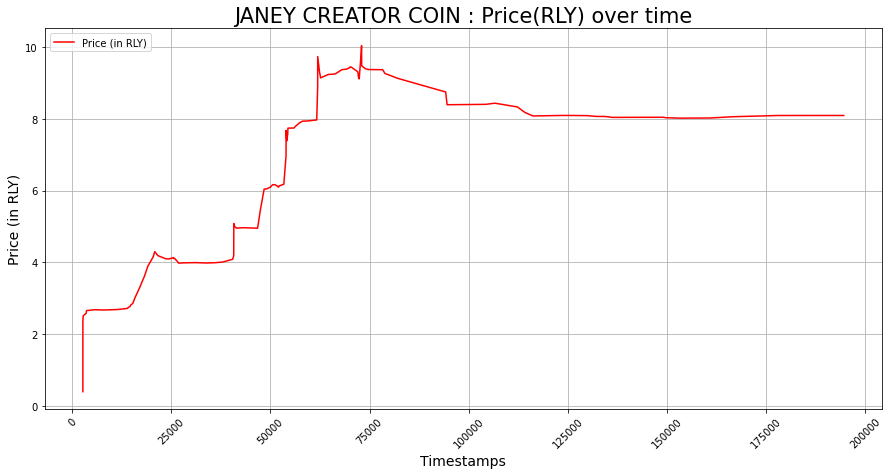

<Figure size 792x648 with 0 Axes>

In [100]:
janeyDF['Price (in RLY)'] = janeyDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('JANEY CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(janeyDF[janeyDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $NNKC Creator Coin
Rally dashboard link - [https://rally.io/creator/NNKC/](https://rally.io/creator/NNKC/) <br>
Twitch link - [https://www.twitch.tv/NiteNightKid](https://www.twitch.tv/NiteNightKid) : 33.8K  followers <br>

- Total RLY backing - 74.8K
- Total $NNKC - 97.8K

- Total Supporters - 58 (total A/cs that transacted in $NNKC)
- Total transactions - 87

In [101]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(nnkcDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [102]:
period_min = 3
period_max = len(nnkcDF)
period_init = len(nnkcDF)

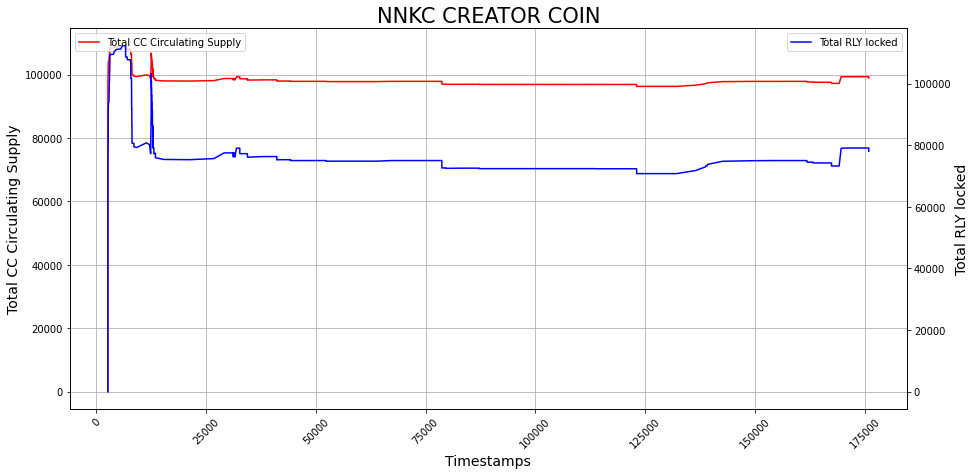

In [103]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('NNKC CREATOR COIN', fontsize=21)

ax.plot(nnkcDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( nnkcDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-104-672c44108c7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nnkcDF['Price (in RLY)'] = nnkcDF.apply(lambda row: getPrice(row), axis = 1 )


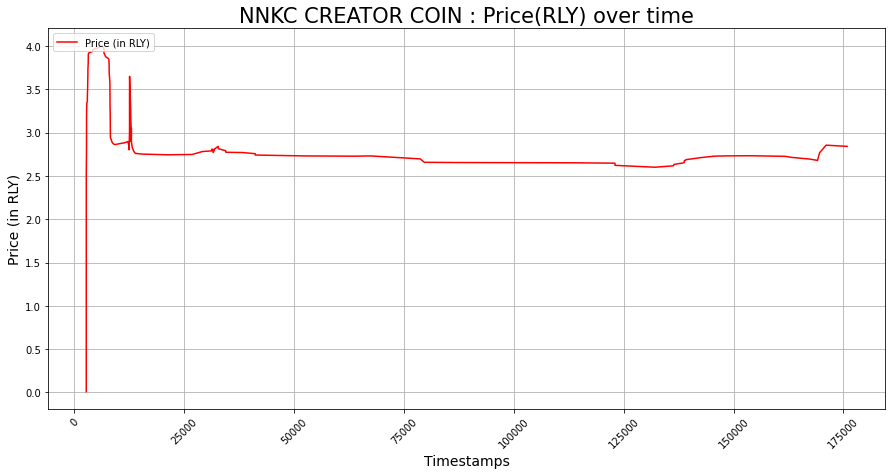

<Figure size 792x648 with 0 Axes>

In [104]:
nnkcDF['Price (in RLY)'] = nnkcDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('NNKC CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(nnkcDF[nnkcDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $BTC Creator Coin
Rally dashboard link - [https://rally.io/creator/BTC/](https://rally.io/creator/BTC/) <br>
Twitch link - [https://www.twitch.tv/blametruthoc](https://www.twitch.tv/blametruthoc) : 64.4K  followers <br>

- Total RLY backing - 90.6K
- Total $BTC - 103.1K

- Total Supporters - 23 (total A/cs that transacted in $BTC)
- Total transactions - 32

In [105]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(btcDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [106]:
period_min = 3
period_max = len(btcDF)
period_init = len(btcDF)

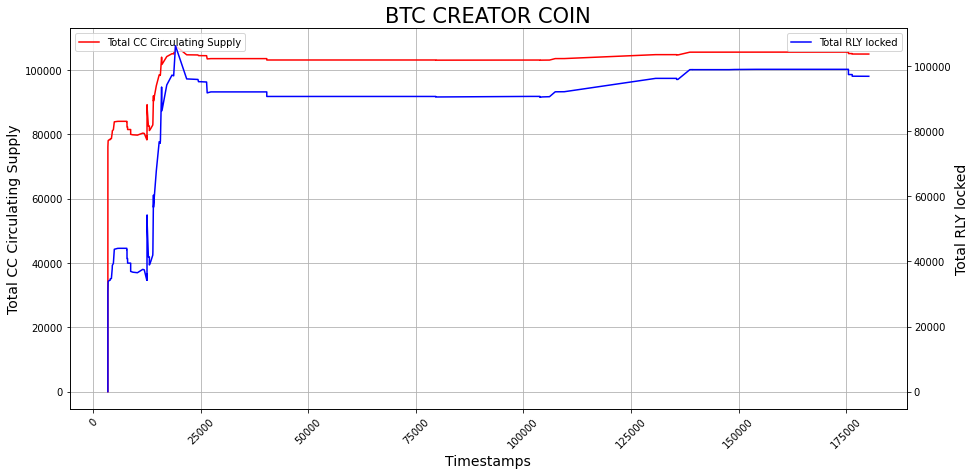

In [107]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('BTC CREATOR COIN', fontsize=21)

ax.plot(btcDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( btcDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-108-03f76718caa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btcDF['Price (in RLY)'] = btcDF.apply(lambda row: getPrice(row), axis = 1 )


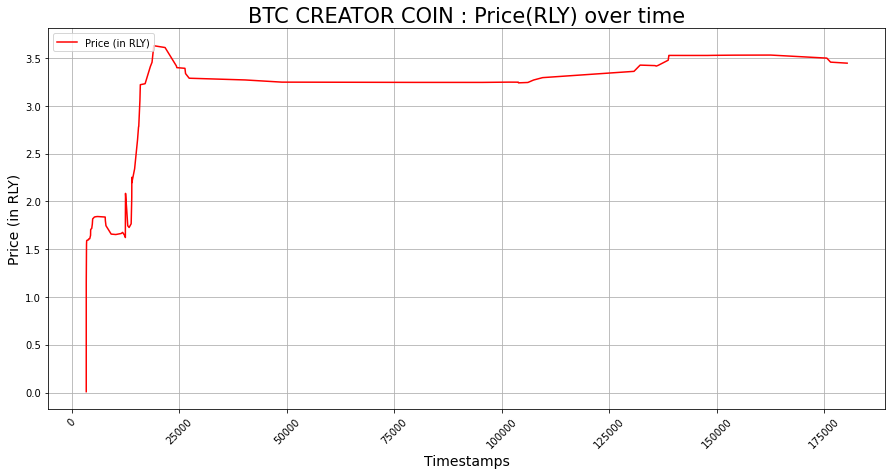

<Figure size 792x648 with 0 Axes>

In [108]:
btcDF['Price (in RLY)'] = btcDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('BTC CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(btcDF[btcDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $SKOT Creator Coin
Description - I love story telling and finding new ways for people to experience stories. I'm the creator of Able Black, a story driven puzzle game with over 110k downloads (iOS, Steam). I co-created Lost Zombies, a zombie themed social network for developing and publishing zombie stories. Lost Zombies won two SXSW web awards and at its peak had over 30k users participating.


Rally dashboard link - [https://rally.io/creator/SKOT/](https://rally.io/creator/SKOT/) <br>
Twitter link - [https://twitter.com/lostzombies](https://twitter.com/lostzombies) : 34.7K followers <br>

- Total RLY backing - 344.5K
- Total $SKOT - 136.7K

- Total Supporters - 90 (total A/cs that transacted in $SKOT)
- Total transactions - 195

In [109]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(skotDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [110]:
period_min = 3
period_max = len(skotDF)
period_init = len(skotDF)

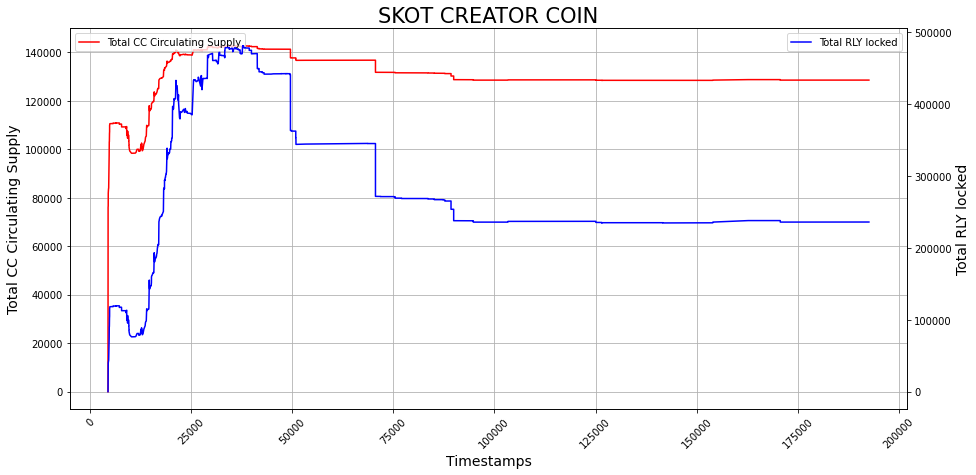

In [111]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SKOT CREATOR COIN', fontsize=21)

ax.plot(skotDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( skotDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-112-ac1bcc7637dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skotDF['Price (in RLY)'] = skotDF.apply(lambda row: getPrice(row), axis = 1 )


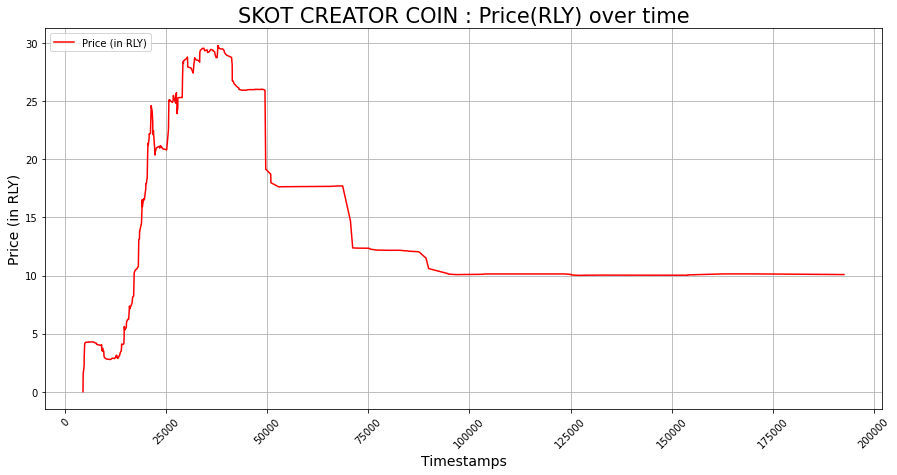

<Figure size 792x648 with 0 Axes>

In [112]:
skotDF['Price (in RLY)'] = skotDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SKOT CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(skotDF[skotDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $MIZZY Creator Coin
Rally dashboard link - [https://rally.io/creator/MIZZY/](https://rally.io/creator/MIZZY/) <br>
Twitch link - [https://www.twitch.tv/mizzy](https://www.twitch.tv/mizzy) : 276K followers <br>

- Total RLY backing - 103.1K
- Total $MIZZY - 106.7K

- Total Supporters - 87 (total A/cs that transacted in $MIZZY)
- Total transactions - 110

In [113]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(mizzyDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [114]:
period_min = 3
period_max = len(mizzyDF)
period_init = len(mizzyDF)

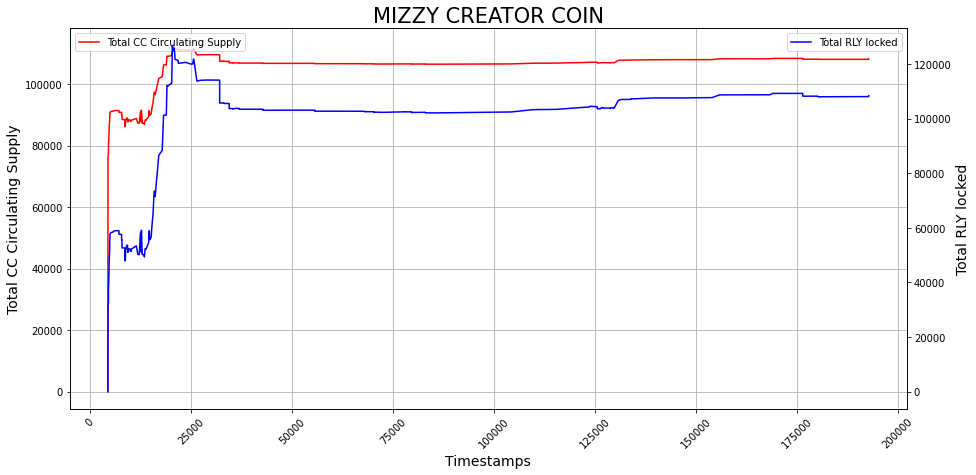

In [115]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('MIZZY CREATOR COIN', fontsize=21)

ax.plot(mizzyDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( mizzyDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-116-41e088458b5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mizzyDF['Price (in RLY)'] = mizzyDF.apply(lambda row: getPrice(row), axis = 1 )


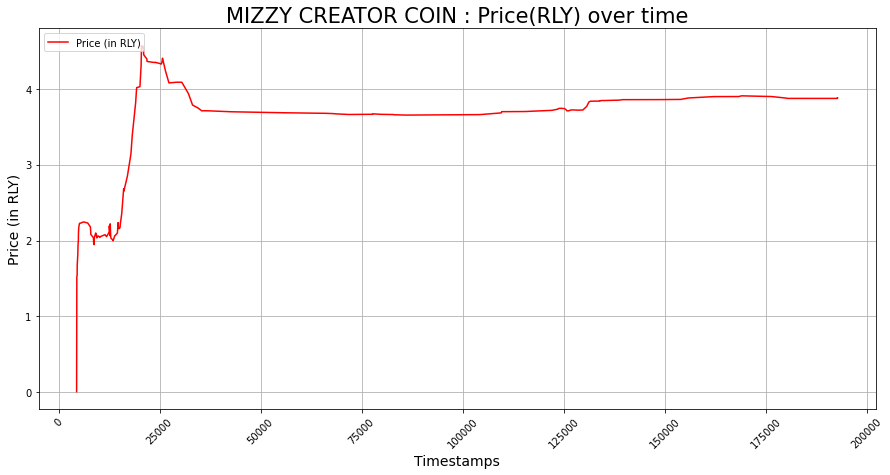

<Figure size 792x648 with 0 Axes>

In [116]:
mizzyDF['Price (in RLY)'] = mizzyDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('MIZZY CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(mizzyDF[mizzyDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $CHOU Creator Coin
Description - Founder of Rally Network, Gen.G esports and Kabam


Rally dashboard link - [https://rally.io/creator/CHOU/](https://rally.io/creator/CHOU/) <br>
Twitter link - [https://twitter.com/KevinChou](https://twitter.com/KevinChou) : 9253  followers <br>

- Total RLY backing - 198K
- Total $CHOU - 124.3K

- Total Supporters - 73 (total A/cs that transacted in $CHOU)
- Total transactions - 130

In [117]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(chouDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [118]:
period_min = 3
period_max = len(chouDF)
period_init = len(chouDF)

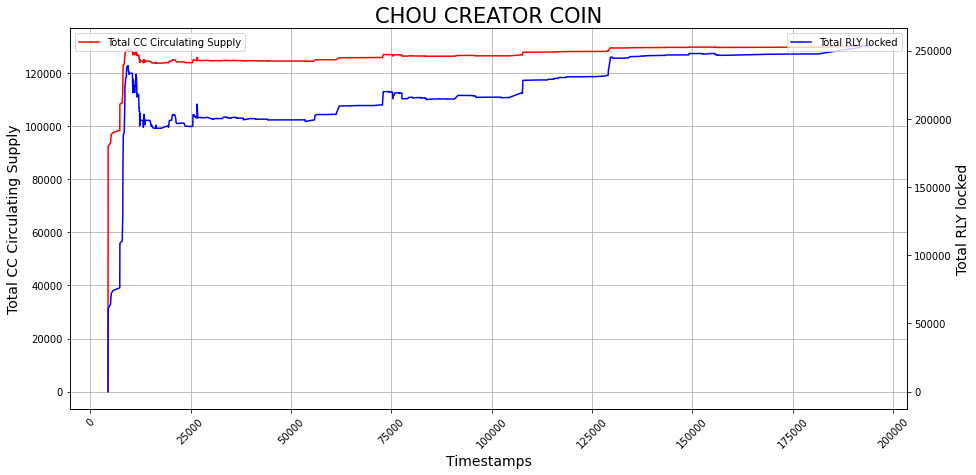

In [119]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CHOU CREATOR COIN', fontsize=21)

ax.plot(chouDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( chouDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-120-4ce9909b9c60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chouDF['Price (in RLY)'] = chouDF.apply(lambda row: getPrice(row), axis = 1 )


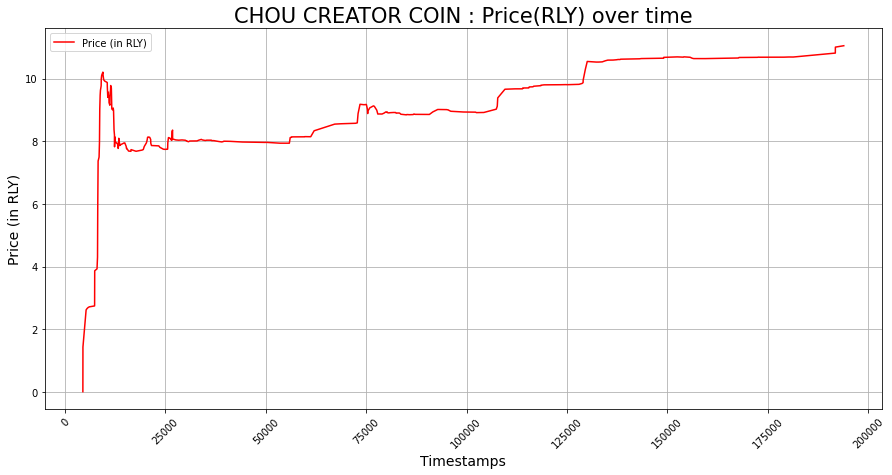

<Figure size 792x648 with 0 Axes>

In [120]:
chouDF['Price (in RLY)'] = chouDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CHOU CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(chouDF[chouDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $KSK Creator Coin
Description: Professional Footballer (FW/MF) Entrepreneur Educator [https://kskgroup.co/](https://kskgroup.co/)
        
        
Rally dashboard link - [https://rally.io/creator/KSK/](https://rally.io/creator/KSK/) <br>
Twitter link - [https://twitter.com/kskgroup2017](https://twitter.com/kskgroup2017) : 1M Followers <br>

- Total RLY backing - 412.4K
- Total $KSK - 140.1K

- Total Supporters - 318 (total A/cs that transacted in $KSK)
- Total transactions - 525

In [121]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(kskDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [122]:
period_min = 3
period_max = len(kskDF)
period_init = len(kskDF)

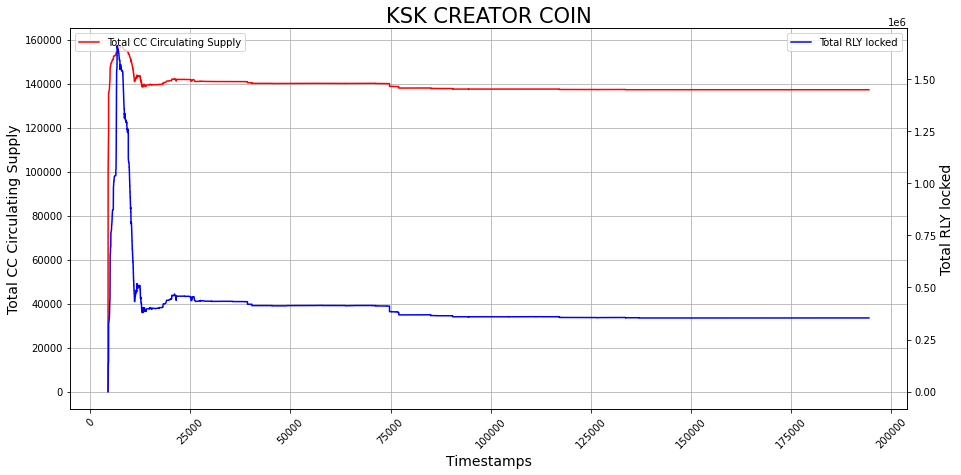

In [123]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('KSK CREATOR COIN', fontsize=21)

ax.plot(kskDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( kskDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-124-368d68343e5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kskDF['Price (in RLY)'] = kskDF.apply(lambda row: getPrice(row), axis = 1 )


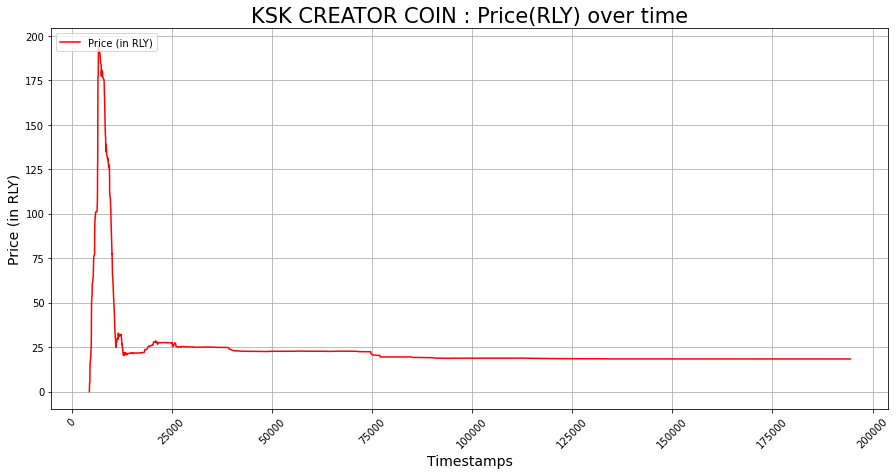

<Figure size 792x648 with 0 Axes>

In [124]:
kskDF['Price (in RLY)'] = kskDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('KSK CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(kskDF[kskDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $FLYNN Creator Coin
Rally dashboard link - [https://rally.io/creator/FLYNN/](https://rally.io/creator/FLYNN/) <br>
Twitch link - Coming Soon <br>

- Total RLY backing - Coming Soon
- Total $FLYNN - Coming Soon

- Total Supporters - Coming Soon (total A/cs that transacted in $FLYNN)
- Total transactions - Coming Soon

In [125]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(flynnDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [126]:
period_min = 3
period_max = len(flynnDF)
period_init = len(flynnDF)

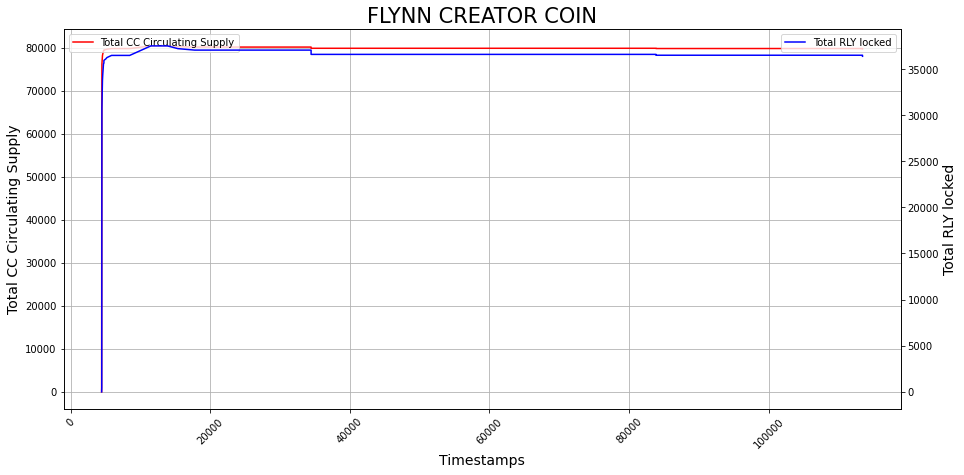

In [127]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('FLYNN CREATOR COIN', fontsize=21)

ax.plot(flynnDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( flynnDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-128-964e5e46b90b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flynnDF['Price (in RLY)'] = flynnDF.apply(lambda row: getPrice(row), axis = 1 )


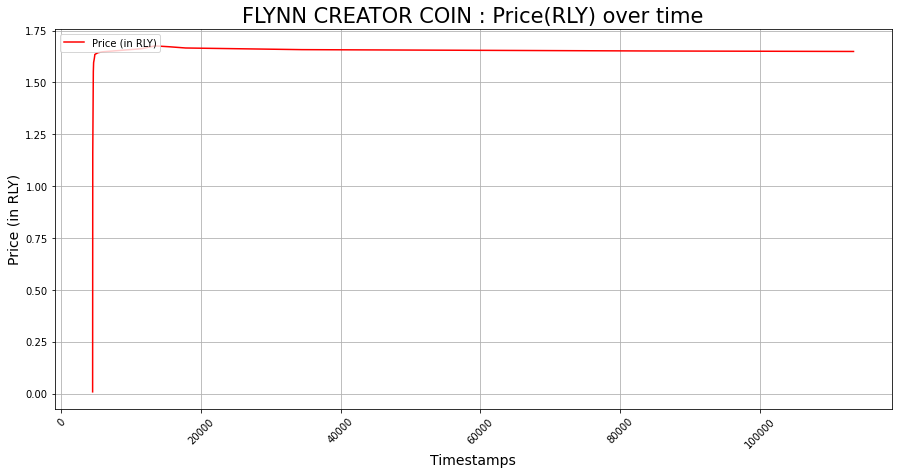

<Figure size 792x648 with 0 Axes>

In [128]:
flynnDF['Price (in RLY)'] = flynnDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('FLYNN CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(flynnDF[flynnDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $GGSC Creator Coin
Rally dashboard link - [https://rally.io/creator/GGSC/](https://rally.io/creator/GGSC/) <br>
Twitch link - [https://www.twitch.tv/gengesports](https://www.twitch.tv/gengesports) : 6.2K  followers <br>

- Total RLY backing - 130.5K
- Total $GGSC - 113.3K

- Total Supporters - 387 (total A/cs that transacted in $GGSC)
- Total transactions - 491

In [129]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(ggscDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [130]:
period_min = 3
period_max = len(ggscDF)
period_init = len(ggscDF)

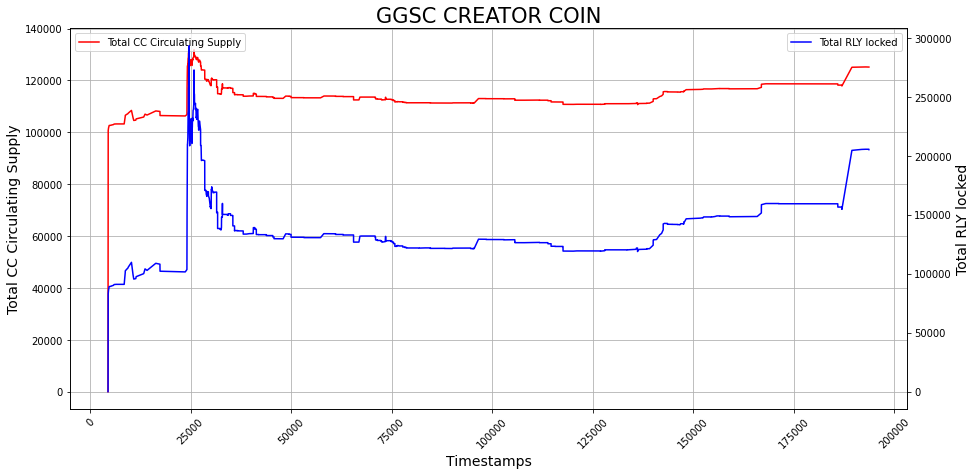

In [131]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('GGSC CREATOR COIN', fontsize=21)

ax.plot(ggscDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( ggscDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-132-5d7a443fe26f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ggscDF['Price (in RLY)'] = ggscDF.apply(lambda row: getPrice(row), axis = 1 )


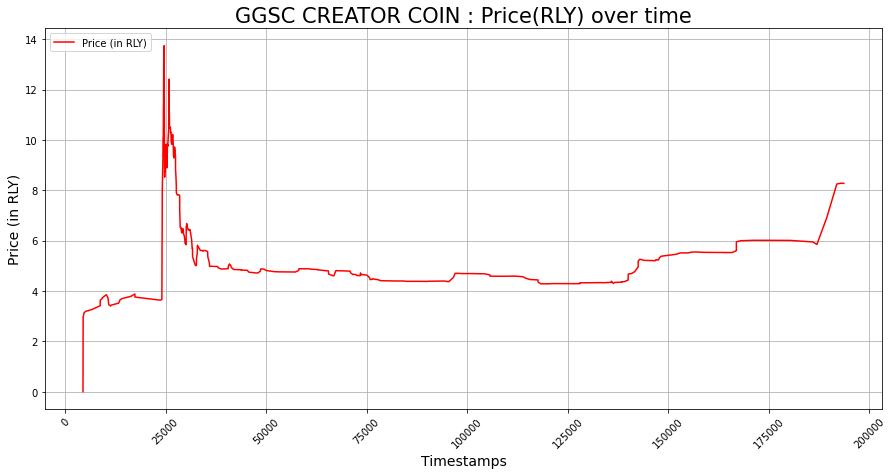

<Figure size 792x648 with 0 Axes>

In [132]:
ggscDF['Price (in RLY)'] = ggscDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('GGSC CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(ggscDF[ggscDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $3CR8 Creator Coin 
Rally dashboard link - [https://rally.io/creator/3CR8/](https://rally.io/creator/3CR8/) <br>

Website Link - [https://selahonline.com/](https://selahonline.com/)

Twitter Link - [https://twitter.com/SelahOnline](https://twitter.com/SelahOnline) : 15.3K followers
Twitch link - [https://www.twitch.tv/selahofficial](https://www.twitch.tv/selahofficial) : 74  followers <br>

- Total RLY backing - 120.7K
- Total $3CR8 - 111.1K

- Total Supporters - 62 (total A/cs that transacted in $3CR8)
- Total transactions - 143

In [133]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(_3cr8DF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [134]:
period_min = 3
period_max = len(_3cr8DF)
period_init = len(_3cr8DF)

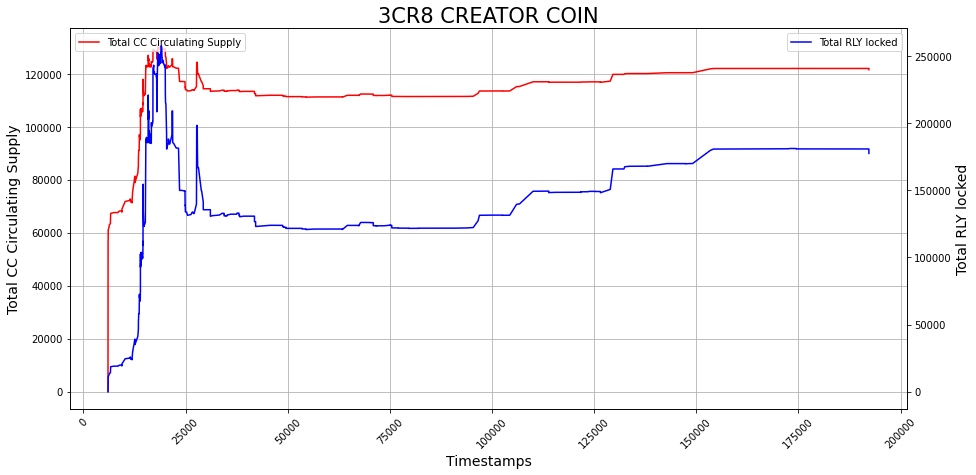

In [135]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('3CR8 CREATOR COIN', fontsize=21)

ax.plot(_3cr8DF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( _3cr8DF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-136-62fdd44fae9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _3cr8DF['Price (in RLY)'] = _3cr8DF.apply(lambda row: getPrice(row), axis = 1 )


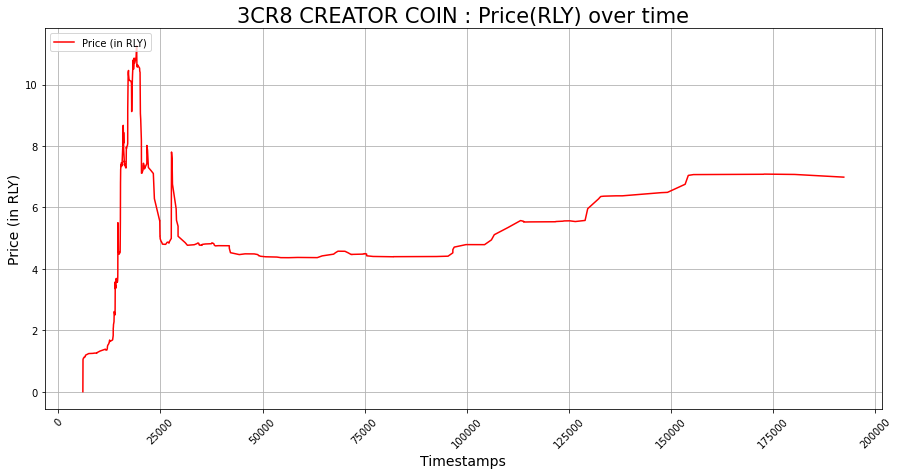

<Figure size 792x648 with 0 Axes>

In [136]:
_3cr8DF['Price (in RLY)'] = _3cr8DF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('3CR8 CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(_3cr8DF[_3cr8DF['Price (in RLY)']>0]['Price (in RLY)'],  '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $SUSIE Creator Coin 

Rally dashboard link - [https://rally.io/creator/SUSIE/](https://rally.io/creator/SUSIE/) <br>

Twitch Link - [https://www.twitch.tv/lilsusie](https://www.twitch.tv/lilsusie) : 2.5K followers <br>
Twitter link - [https://twitter.com/lilsusie](https://twitter.com/lilsusie) : 47.7K  followers <br>

- Total RLY backing - 50.6K
- Total $SUSIE - 87.5K

- Total Supporters - 23 (total A/cs that transacted in $SUSIE)
- Total transactions - 26

In [137]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(susieDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [138]:
period_min = 3
period_max = len(susieDF)
period_init = len(susieDF)

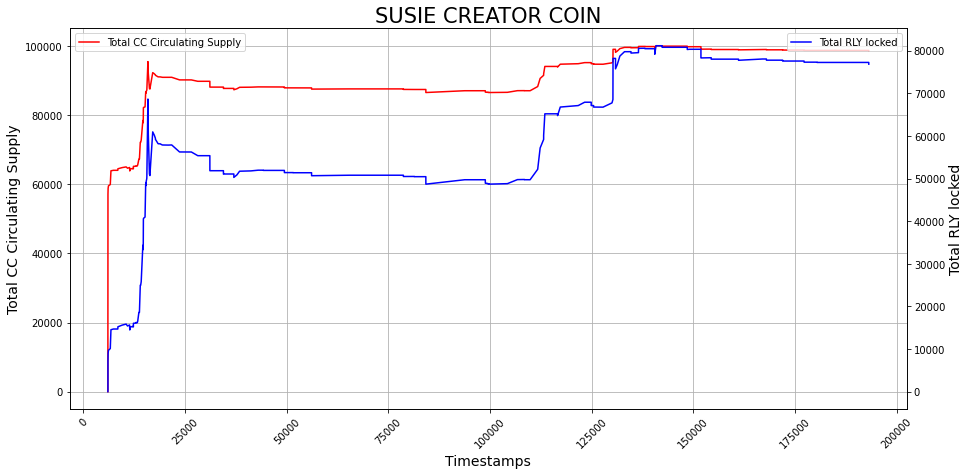

In [139]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SUSIE CREATOR COIN', fontsize=21)

ax.plot(susieDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( susieDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-140-e25d52197cdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  susieDF['Price (in RLY)'] = susieDF.apply(lambda row: getPrice(row), axis = 1 )


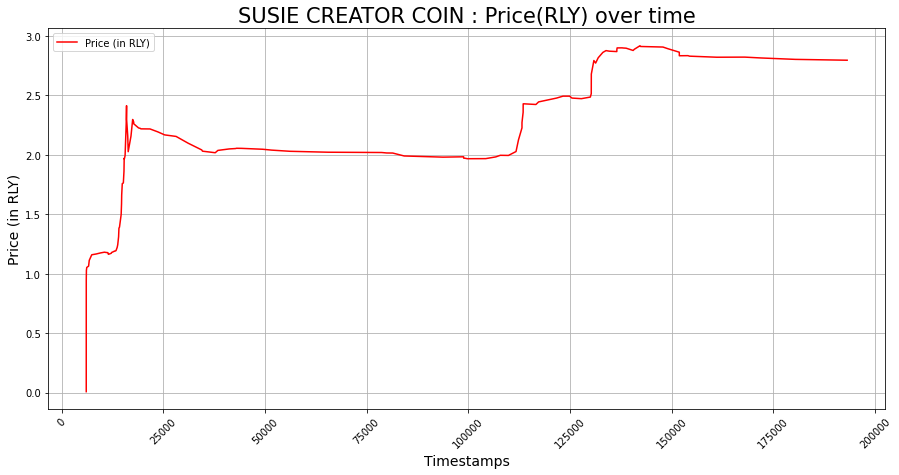

<Figure size 792x648 with 0 Axes>

In [140]:
susieDF['Price (in RLY)'] = susieDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SUSIE CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(susieDF[susieDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $CON Creator Coin 
Rally dashboard link - [https://rally.io/creator/CON/](https://rally.io/creator/CON/) <br>

Instagram Link - [https://www.instagram.com/conradjackcarr/](https://www.instagram.com/conradjackcarr/) : 48.6k followers

- Total RLY backing - 45.2K
- Total $CON - 84.7K

- Total Supporters - 14 (total A/cs that transacted in $CON)
- Total transactions - 22

In [141]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(conDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [142]:
period_min = 3
period_max = len(conDF)
period_init = len(conDF)

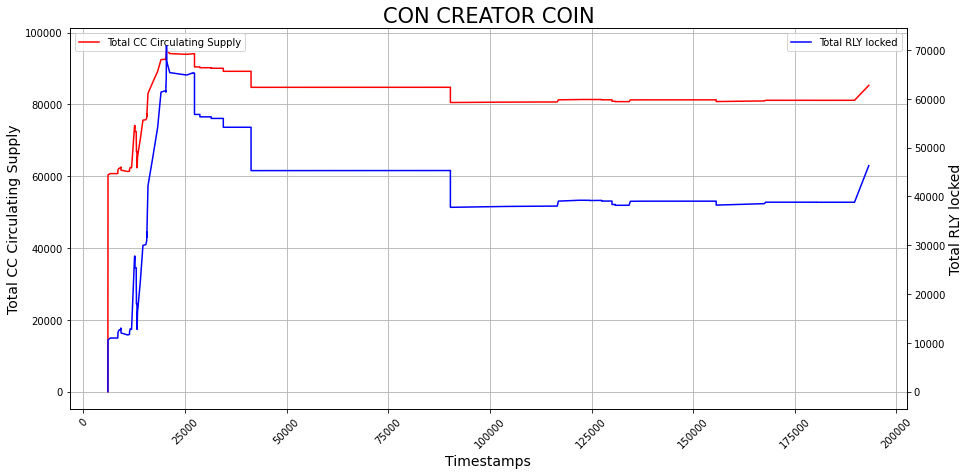

In [143]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CON CREATOR COIN', fontsize=21)

ax.plot(conDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( conDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-144-268383daa4c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conDF['Price (in RLY)'] = conDF.apply(lambda row: getPrice(row), axis = 1 )


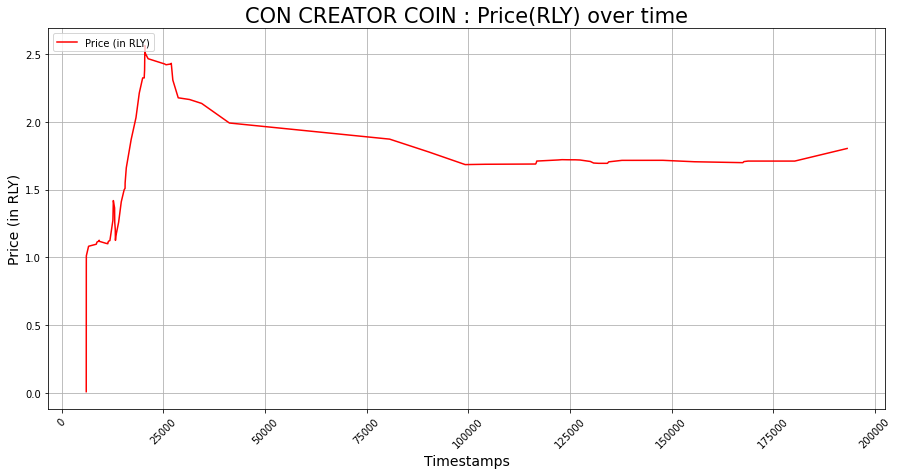

<Figure size 792x648 with 0 Axes>

In [144]:
conDF['Price (in RLY)'] = conDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CON CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(conDF[conDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $SCRLA Creator Coin 
Rally dashboard link - [https://rally.io/creator/SCRLA/](https://rally.io/creator/SCRLA/) <br>

Twitter Link - Coming Soon  <br>
Twitch link - Coming Soon <br>

- Total RLY backing - Coming Soon
- Total $SCRLA - Coming Soon

- Total Supporters - Coming Soon (total A/cs that transacted in $SCRLA)
- Total transactions - Coming Soon

In [145]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(scrlaDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [146]:
period_min = 3
period_max = len(scrlaDF)
period_init = len(scrlaDF)

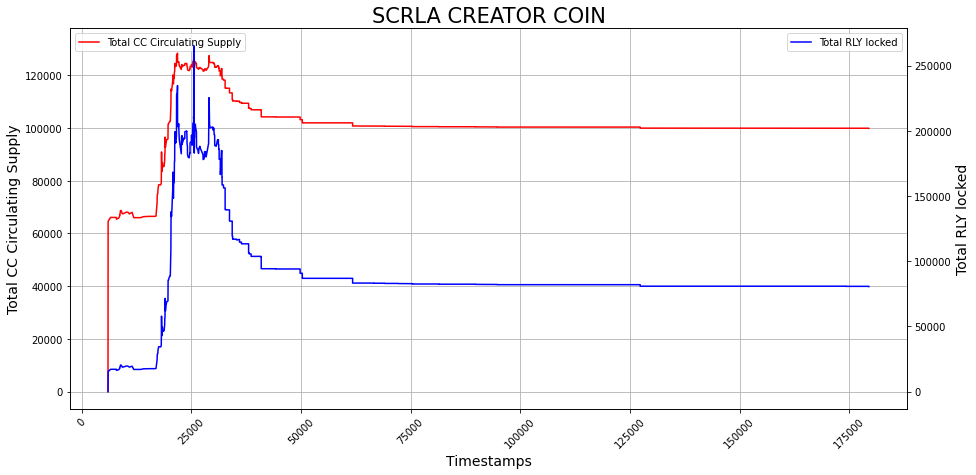

In [147]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SCRLA CREATOR COIN', fontsize=21)

ax.plot(scrlaDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( scrlaDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-148-663cb46bbafd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scrlaDF['Price (in RLY)'] = scrlaDF.apply(lambda row: getPrice(row), axis = 1 )


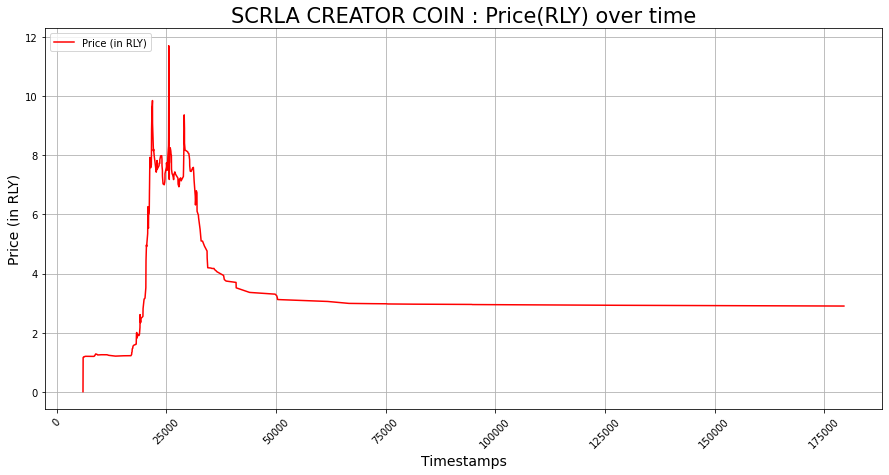

<Figure size 792x648 with 0 Axes>

In [148]:
scrlaDF['Price (in RLY)'] = scrlaDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SCRLA CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(scrlaDF[scrlaDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $PRO Creator Coin 
Rally dashboard link - [https://rally.io/creator/PRO/](https://rally.io/creator/PRO/) <br>

Twitter Link - [https://twitter.com/PlatformProTV](https://twitter.com/PlatformProTV) : 25 Followers
Twitch link - [https://www.twitch.tv/platformprotv](https://www.twitch.tv/platformprotv) : 10 followers <br>

- Total RLY backing - 33.4K
- Total $PRO - 77.8K

- Total Supporters - 67 (total A/cs that transacted in $PRO)
- Total transactions - 154

In [149]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(proDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [150]:
period_min = 3
period_max = len(proDF)
period_init = len(proDF)

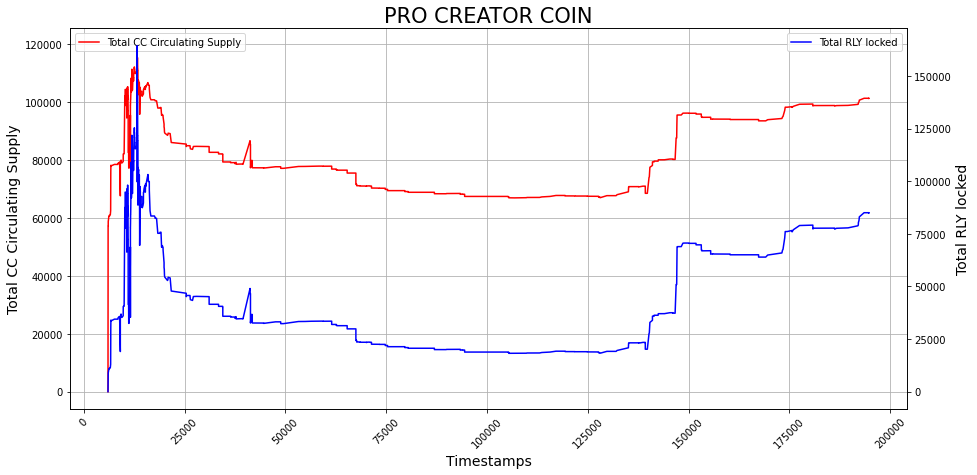

In [151]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('PRO CREATOR COIN', fontsize=21)

ax.plot(proDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( proDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-152-86cda8fdd896>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proDF['Price (in RLY)'] = proDF.apply(lambda row: getPrice(row), axis = 1 )


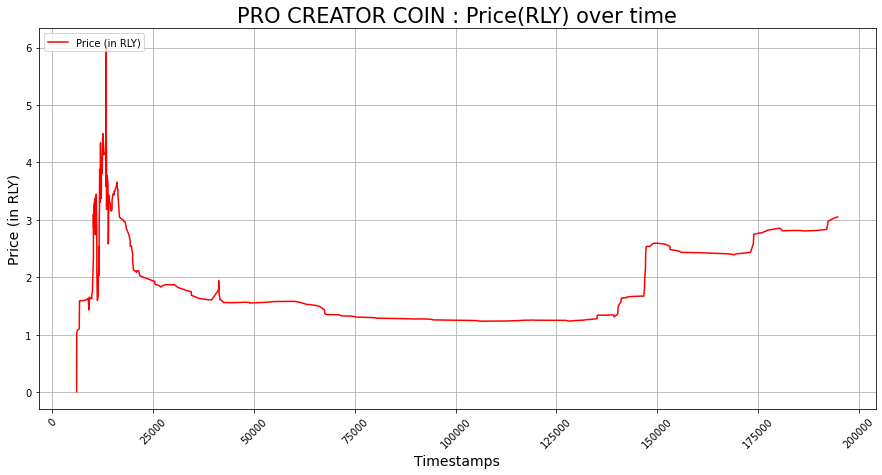

<Figure size 792x648 with 0 Axes>

In [152]:
proDF['Price (in RLY)'] = proDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('PRO CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(proDF[proDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $SHIPR Creator Coin 
Rally dashboard link - [https://rally.io/creator/SHIPR/](https://rally.io/creator/SHIPR/) <br>

Twitter Link - [https://twitter.com/TheGamersNet2](https://twitter.com/TheGamersNet2) : 3,238 Followers
Twitch link - [https://www.twitch.tv/shipbroman](https://www.twitch.tv/shipbroman) : 65.5K followers <br>

- Total RLY backing - 65.4K
- Total $SHIPR - 94.1K

- Total Supporters - 18 (total A/cs that transacted in $SHIPR)
- Total transactions - 28

In [153]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(shiprDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [154]:
period_min = 3
period_max = len(shiprDF)
period_init = len(shiprDF)

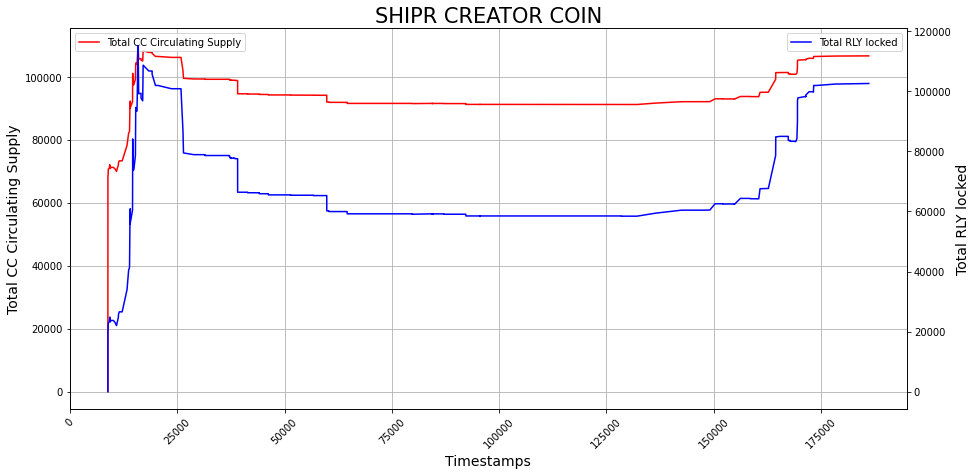

In [155]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SHIPR CREATOR COIN', fontsize=21)

ax.plot(shiprDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( shiprDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-156-c0c085de2a07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shiprDF['Price (in RLY)'] = shiprDF.apply(lambda row: getPrice(row), axis = 1 )


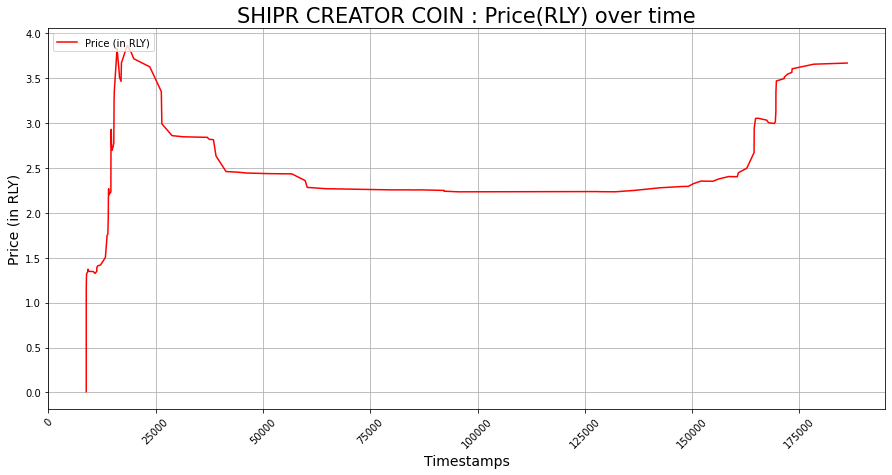

<Figure size 792x648 with 0 Axes>

In [156]:
shiprDF['Price (in RLY)'] = shiprDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SHIPR CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(shiprDF[shiprDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $CHRIS Creator Coin 
Rally dashboard link - [https://rally.io/creator/CHRIS/](https://rally.io/creator/CHRIS/) <br>

Twitter Link - [https://twitter.com/ckurdziel](https://twitter.com/ckurdziel) : 2,421 Followers
Twitch link - [https://www.twitch.tv/ch0ppinbroccoli](https://www.twitch.tv/ch0ppinbroccoli) : 10 followers <br>

- Total RLY backing - 86.6K
- Total $CHRIS - 101.8K

- Total Supporters - 28 (total A/cs that transacted in $CHRIS)
- Total transactions - 21

In [157]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(chrisDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [158]:
period_min = 3
period_max = len(chrisDF)
period_init = len(chrisDF)

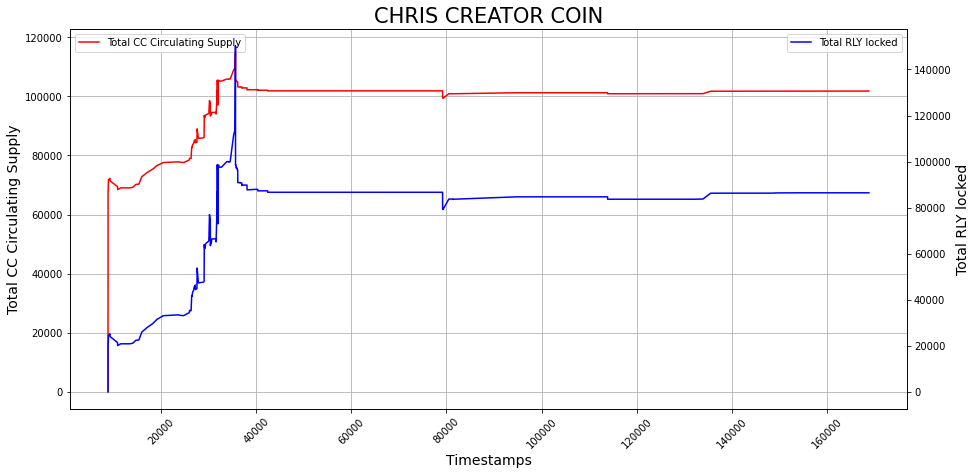

In [159]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CHRIS CREATOR COIN', fontsize=21)

ax.plot(chrisDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( chrisDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-160-80565dd6edaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrisDF['Price (in RLY)'] = chrisDF.apply(lambda row: getPrice(row), axis = 1 )


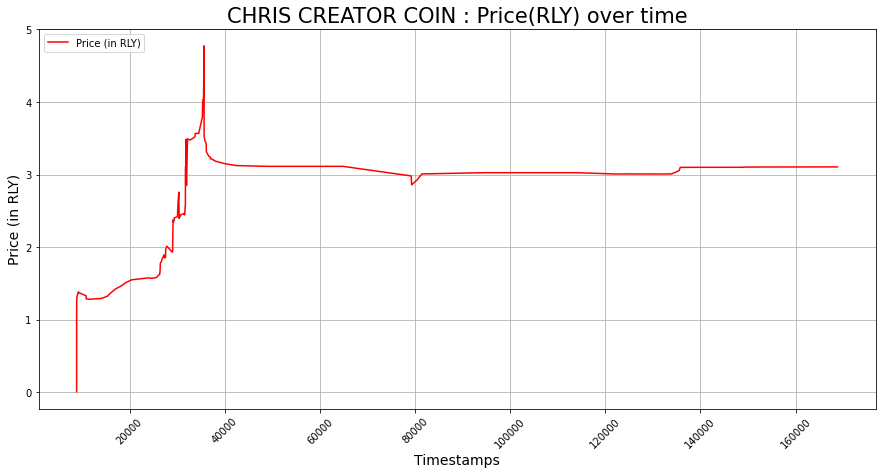

<Figure size 792x648 with 0 Axes>

In [160]:
chrisDF['Price (in RLY)'] = chrisDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('CHRIS CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(chrisDF[chrisDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $AUG Creator Coin 
Rally dashboard link - [https://rally.io/creator/AUG/](https://rally.io/creator/AUG/) <br>

Twitter Link - [https://twitter.com/AuggieVelarde](https://twitter.com/AuggieVelarde) : 5,295 Followers
Twitch link - [https://www.twitch.tv/auggievelarde](https://www.twitch.tv/auggievelarde) : 510 followers <br>

- Total RLY backing - 60.5K
- Total $AUG - 92.1K

- Total Supporters - 38 (total A/cs that transacted in $AUG)
- Total transactions - 29

In [161]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(augDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [162]:
period_min = 3
period_max = len(augDF)
period_init = len(augDF)

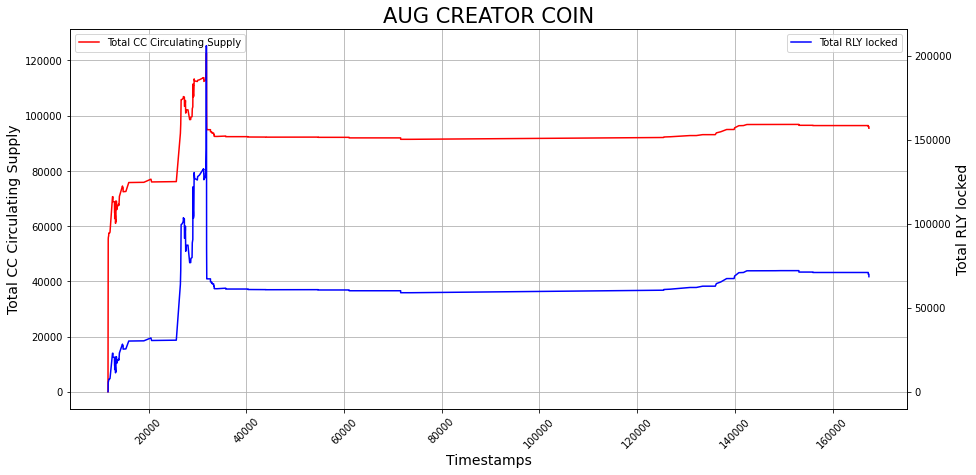

In [163]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('AUG CREATOR COIN', fontsize=21)

ax.plot(augDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( augDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-164-6aa5dc9e1c48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augDF['Price (in RLY)'] = augDF.apply(lambda row: getPrice(row), axis = 1 )


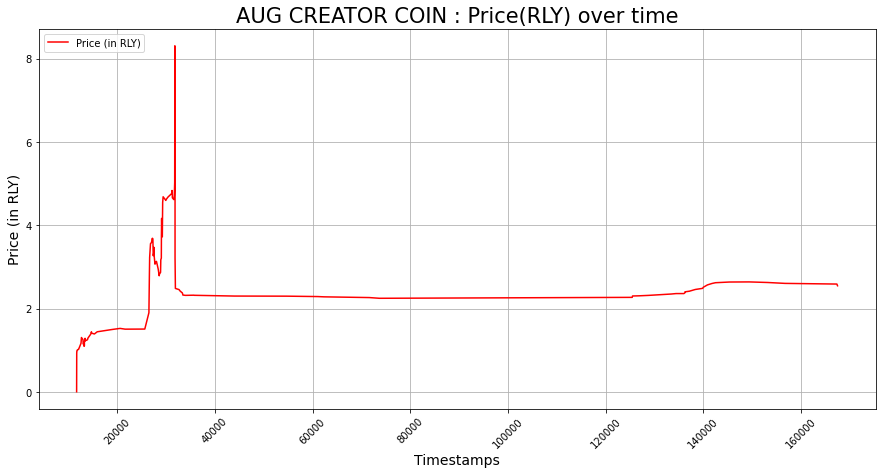

<Figure size 792x648 with 0 Axes>

In [164]:
augDF['Price (in RLY)'] = augDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('AUG CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(augDF[augDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $PTM Creator Coin 
**Bio** - Grammy winning band from Wasilla, Alaska, currently based in Portland, Oregon. 

Rally dashboard link - [https://rally.io/creator/PTM/](https://rally.io/creator/PTM/) <br>
Twitter Link - [https://twitter.com/portugaltheman](https://twitter.com/portugaltheman) : 123K Followers <br>

- Total RLY backing - 168.2K
- Total $PTM - 120.1K

- Total Supporters - 619 (total A/cs that transacted in $PTM)
- Total transactions - 857

In [165]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(ptmDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [166]:
period_min = 3
period_max = len(ptmDF)
period_init = len(ptmDF)

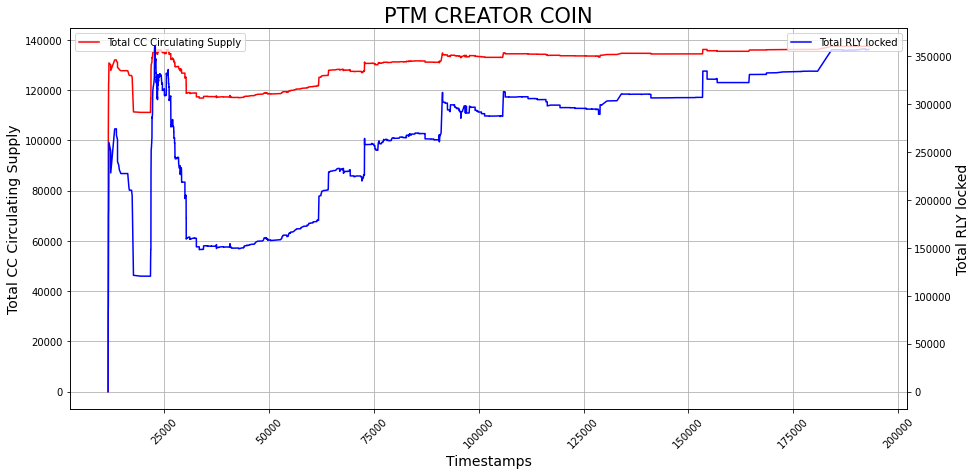

In [167]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('PTM CREATOR COIN', fontsize=21)

ax.plot(ptmDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( ptmDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-168-22813f920d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptmDF['Price (in RLY)'] = ptmDF.apply(lambda row: getPrice(row), axis = 1 )


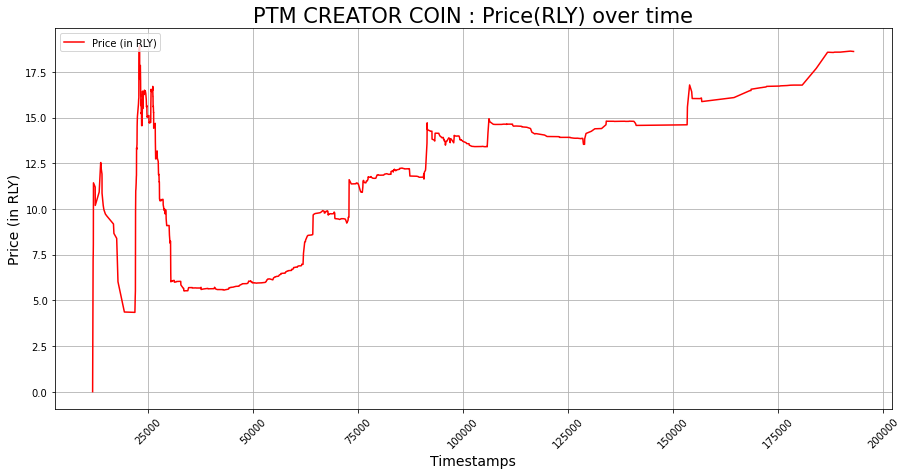

<Figure size 792x648 with 0 Axes>

In [168]:
ptmDF['Price (in RLY)'] = ptmDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('PTM CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(ptmDF[ptmDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $DRZFR Creator Coin 
Rally dashboard link - [https://rally.io/creator/DRZFR/](https://rally.io/creator/DRZFR/) <br>

Twitter Link - [https://twitter.com/SelahOnline](https://twitter.com/SelahOnline) : 15.3K followers
Twitch link - [https://www.twitch.tv/selahofficial](https://www.twitch.tv/selahofficial) : 74  followers <br>

- Total RLY backing - 120.7K
- Total $DRZFR - 111.1K

- Total Supporters - 62 (total A/cs that transacted in $DRZFR)
- Total transactions - 143

In [169]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(drzfrDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [170]:
period_min = 3
period_max = len(drzfrDF)
period_init = len(drzfrDF)

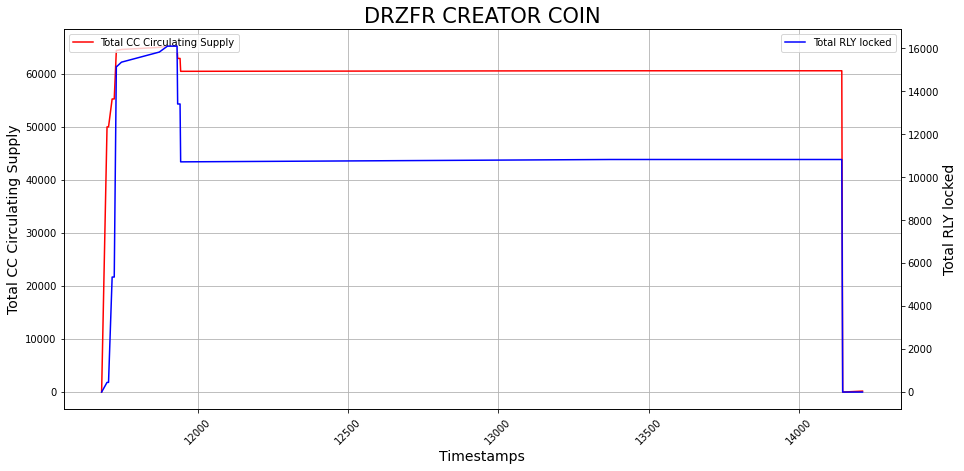

In [171]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('DRZFR CREATOR COIN', fontsize=21)

ax.plot(drzfrDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( drzfrDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-172-ad1b8535e2c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drzfrDF['Price (in RLY)'] = drzfrDF.apply(lambda row: getPrice(row), axis = 1 )


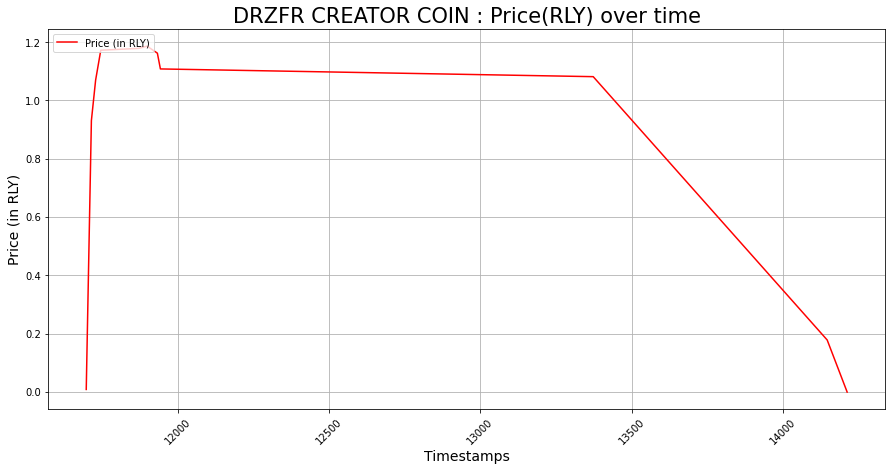

<Figure size 792x648 with 0 Axes>

In [172]:
drzfrDF['Price (in RLY)'] = drzfrDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('DRZFR CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(drzfrDF[drzfrDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $SOUL Creator Coin 
Rally dashboard link - [https://rally.io/creator/SOUL/](https://rally.io/creator/SOUL/) <br>

Twitter Link - [https://www.twitch.tv/soulofjacobeh](https://www.twitch.tv/soulofjacobeh) : 73 followers
Twitch link - [https://twitter.com/Soul_of_Jacobeh](https://twitter.com/Soul_of_Jacobeh) : 102 Followers <br>

- Total RLY backing - 57.3K
- Total $SOUL - 90.6K

- Total Supporters - 46 (total A/cs that transacted in $SOUL)
- Total transactions - 75

In [173]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(soulDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [174]:
period_min = 3
period_max = len(soulDF)
period_init = len(soulDF)

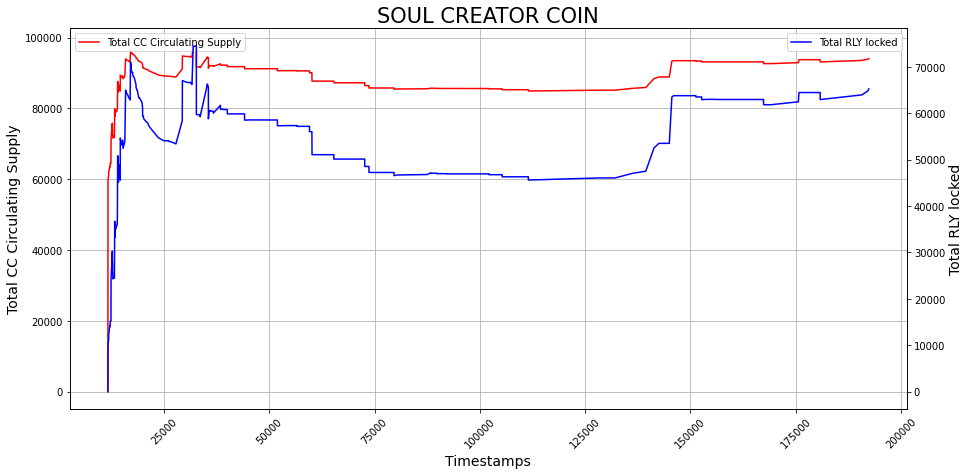

In [175]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SOUL CREATOR COIN', fontsize=21)

ax.plot(soulDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( soulDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-176-adab78d9acc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soulDF['Price (in RLY)'] = soulDF.apply(lambda row: getPrice(row), axis = 1 )


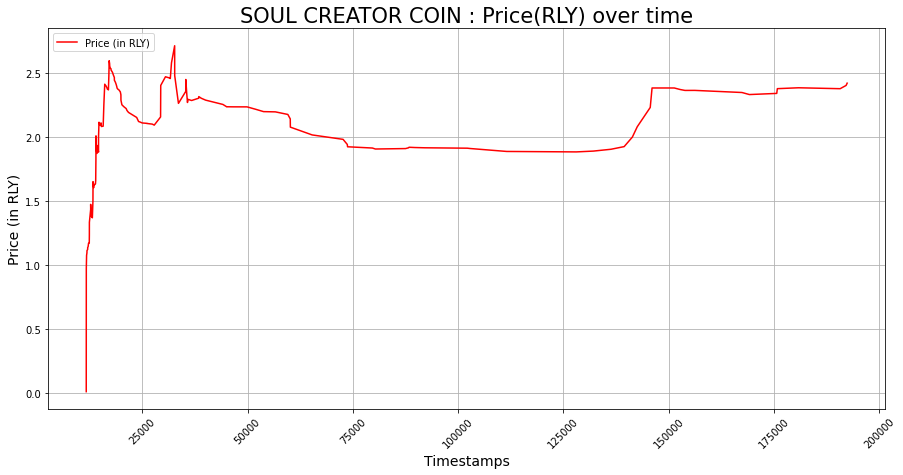

<Figure size 792x648 with 0 Axes>

In [176]:
soulDF['Price (in RLY)'] = soulDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SOUL CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(soulDF[soulDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $RALEX Creator Coin 
Rally dashboard link - Coming Soon <br>

In [177]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(ralexDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [178]:
period_min = 3
period_max = len(ralexDF)
period_init = len(ralexDF)

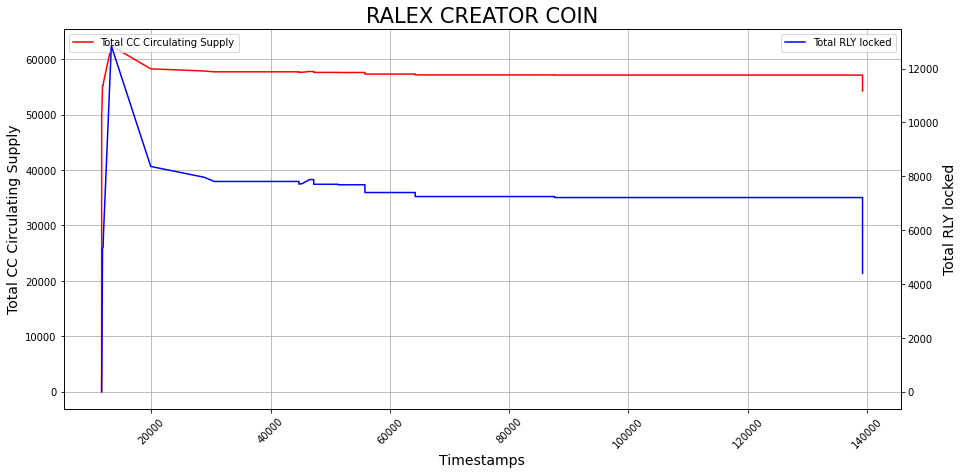

In [179]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('RALEX CREATOR COIN', fontsize=21)

ax.plot(ralexDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( ralexDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-180-b6826ca5d1d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ralexDF['Price (in RLY)'] = ralexDF.apply(lambda row: getPrice(row), axis = 1 )


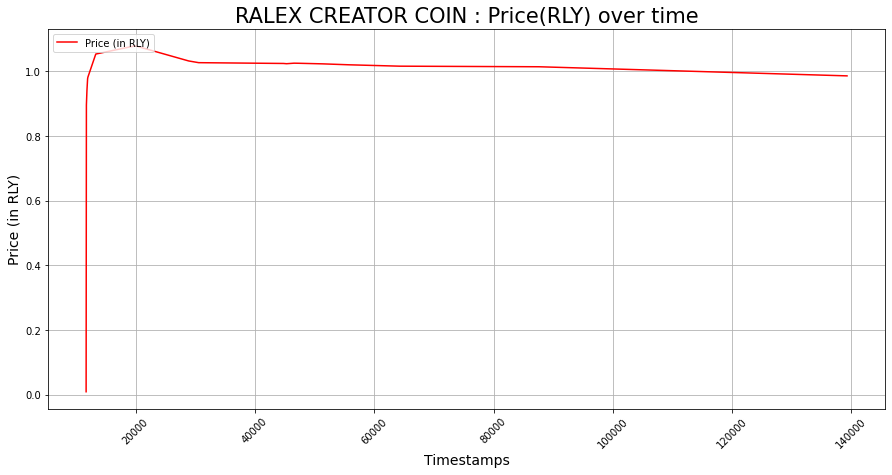

<Figure size 792x648 with 0 Axes>

In [180]:
ralexDF['Price (in RLY)'] = ralexDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('RALEX CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(ralexDF[ralexDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $DRAZE Creator Coin 
Rally dashboard link - [https://rally.io/creator/DRAZE/](https://rally.io/creator/DRAZE/) <br>

Twitter Link - [https://twitter.com/DrazeForce](https://twitter.com/DrazeForce) : 192 Followers
Twitch link - [https://www.twitch.tv/drazeforce](https://www.twitch.tv/drazeforce) : 211 followers <br>

- Total RLY backing - 96.3K
- Total $DRAZE - 104.8K

- Total Supporters - 32 (total A/cs that transacted in $DRAZE)
- Total transactions - 64

In [181]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(drazeDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [182]:
period_min = 3
period_max = len(drazeDF)
period_init = len(drazeDF)

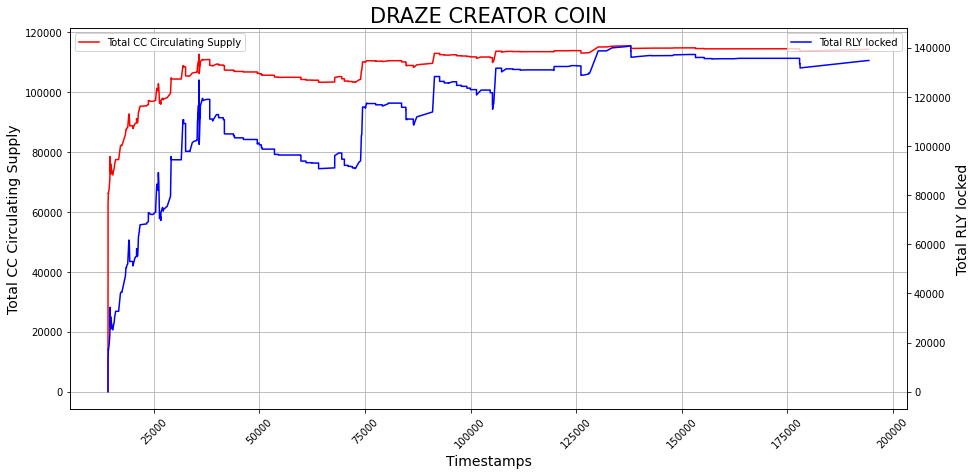

In [183]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('DRAZE CREATOR COIN', fontsize=21)

ax.plot(drazeDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( drazeDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-184-b063ded2ed8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drazeDF['Price (in RLY)'] = drazeDF.apply(lambda row: getPrice(row), axis = 1 )


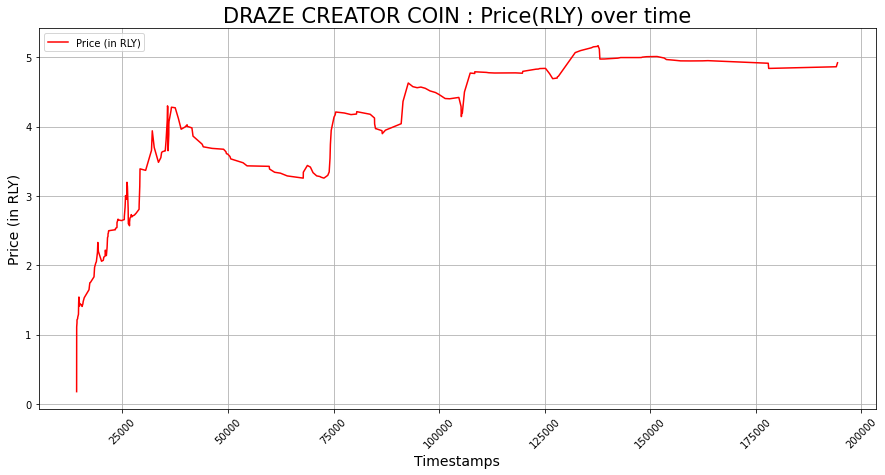

<Figure size 792x648 with 0 Axes>

In [184]:
drazeDF['Price (in RLY)'] = drazeDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('DRAZE CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(drazeDF[drazeDF['Price (in RLY)']>0]['Price (in RLY)'],  '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $MAYOR Creator Coin 
Rally dashboard link - [https://rally.io/creator/MAYOR/](https://rally.io/creator/MAYOR/) <br>

Twitter Link - [https://twitter.com/MayorReynoldsTV](https://twitter.com/MayorReynoldsTV) : 2,353 Followers
Twitch link - [https://www.twitch.tv/mayorreynolds](https://www.twitch.tv/mayorreynolds) : 4.6K followers <br>

- Total RLY backing - 47.4K
- Total $MAYOR - 85.8K

- Total Supporters - 69 (total A/cs that transacted in $MAYOR)
- Total transactions - 48

In [185]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(mayorDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [186]:
period_min = 3
period_max = len(mayorDF)
period_init = len(mayorDF)

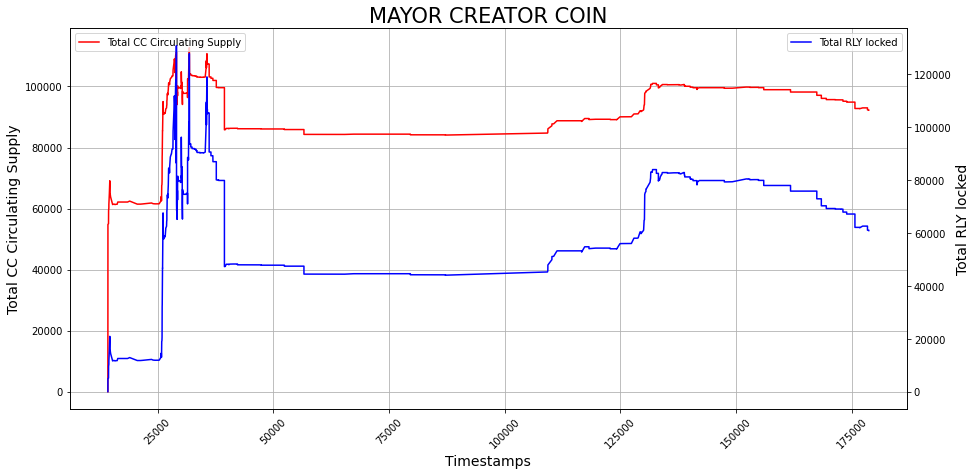

In [187]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('MAYOR CREATOR COIN', fontsize=21)

ax.plot(mayorDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( mayorDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-188-d283386c1b96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayorDF['Price (in RLY)'] = mayorDF.apply(lambda row: getPrice(row), axis = 1 )


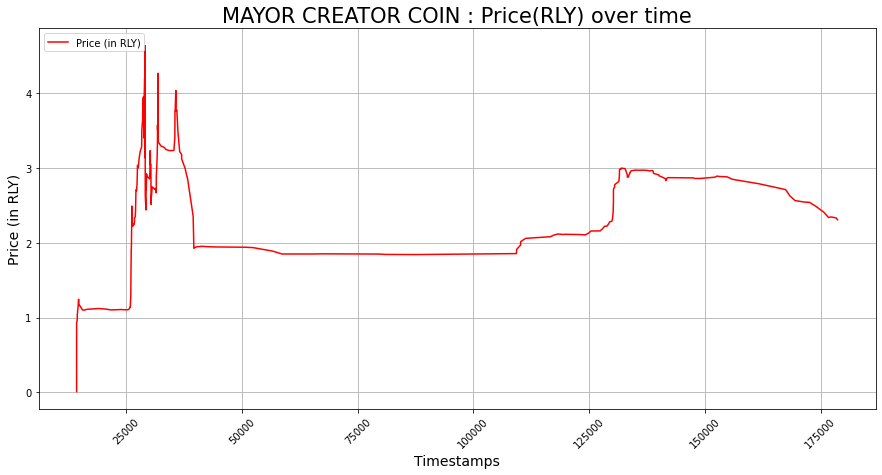

<Figure size 792x648 with 0 Axes>

In [188]:
mayorDF['Price (in RLY)'] = mayorDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('MAYOR CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(mayorDF[mayorDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $SRSH Creator Coin 
Rally dashboard link - [https://rally.io/creator/SRSH/](https://rally.io/creator/SRSH/) <br>

Twitter Link - [https://twitter.com/SeershaMusic](https://twitter.com/SeershaMusic) : 884 Followers
Twitch link - [https://www.twitch.tv/seershamusic](https://www.twitch.tv/seershamusic) : 1.9K followers <br>

- Total RLY backing - 86.1K
- Total $SRSH - 101.7K

- Total Supporters - 44 (total A/cs that transacted in $SRSH)
- Total transactions - 44

In [189]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(srshDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [190]:
period_min = 3
period_max = len(srshDF)
period_init = len(srshDF)

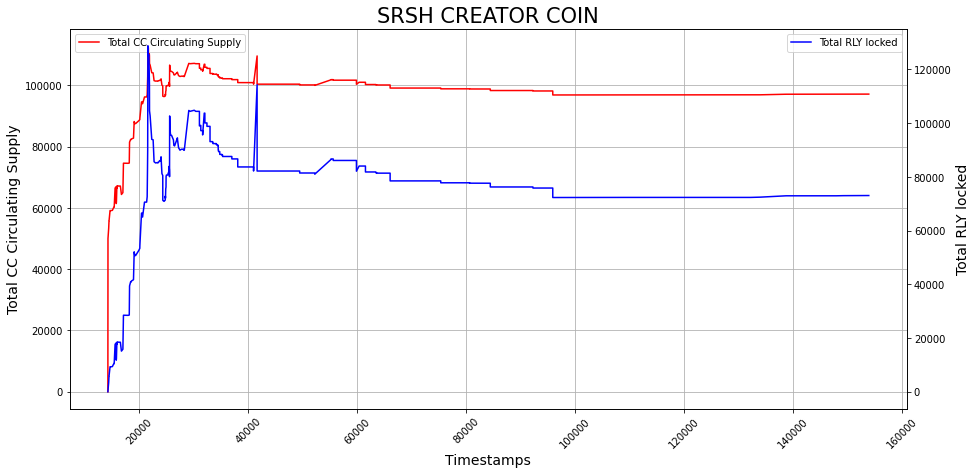

In [191]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SRSH CREATOR COIN', fontsize=21)

ax.plot(srshDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( srshDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-192-af8260c5b332>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srshDF['Price (in RLY)'] = srshDF.apply(lambda row: getPrice(row), axis = 1 )


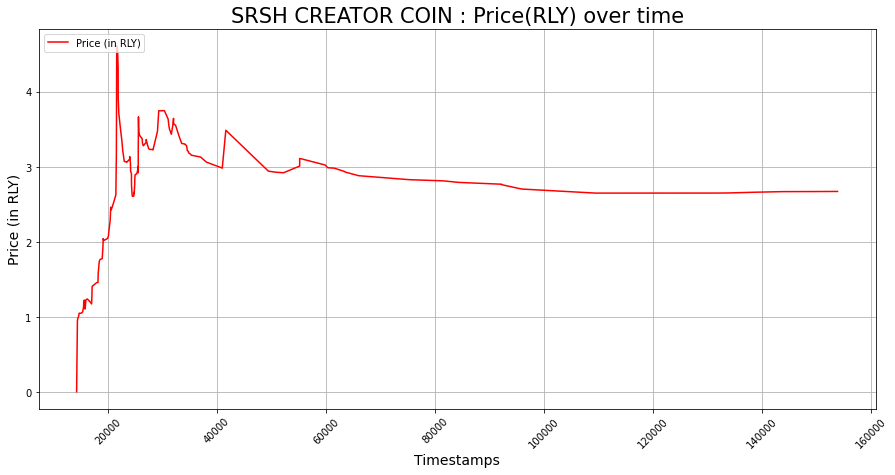

<Figure size 792x648 with 0 Axes>

In [192]:
srshDF['Price (in RLY)'] = srshDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('SRSH CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(srshDF[srshDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $STEP Creator Coin 
Rally dashboard link - [https://rally.io/creator/STEP/](https://rally.io/creator/STEP/) <br>

Twitter Link - [https://twitter.com/SelahOnline](https://twitter.com/SelahOnline) : 15.3K followers
Twitch link - [https://www.twitch.tv/selahofficial](https://www.twitch.tv/selahofficial) : 74  followers <br>

- Total RLY backing - 25.4K
- Total $STEP - 72.4K

- Total Supporters - 172 (total A/cs that transacted in $STEP)
- Total transactions - 210

In [193]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(stepDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [194]:
period_min = 3
period_max = len(stepDF)
period_init = len(stepDF)

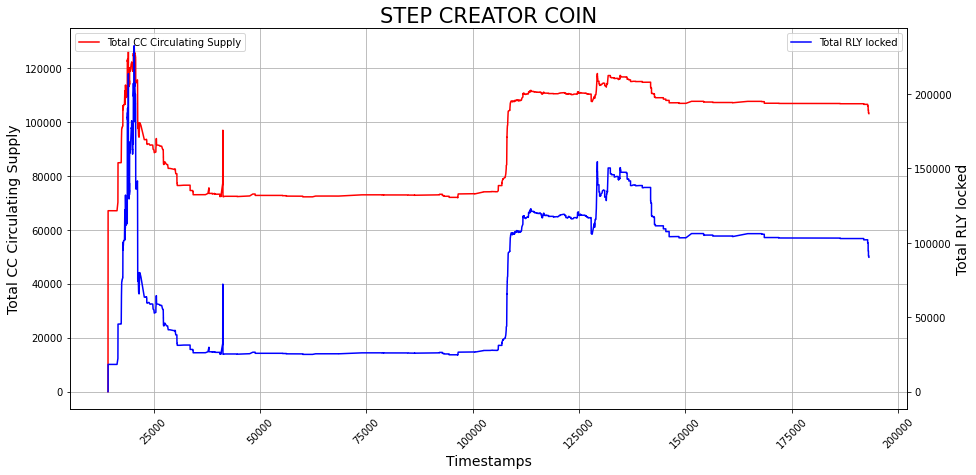

In [195]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('STEP CREATOR COIN', fontsize=21)

ax.plot(stepDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( stepDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-196-feaed11028f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stepDF['Price (in RLY)'] = stepDF.apply(lambda row: getPrice(row), axis = 1 )


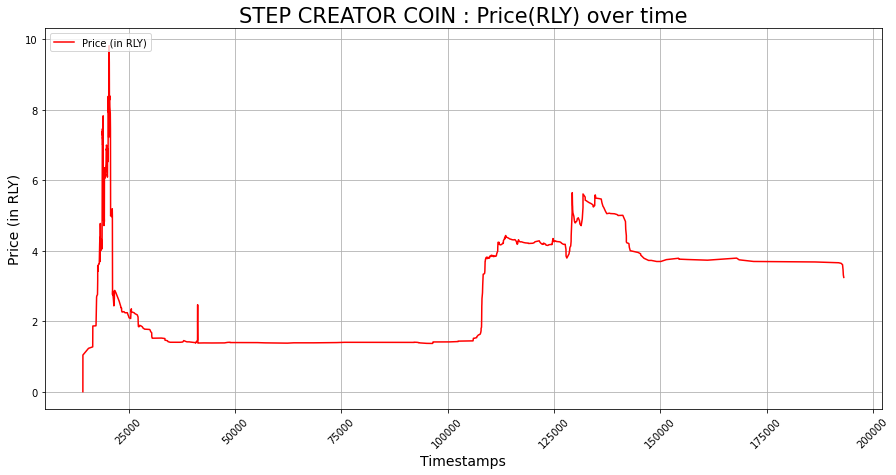

<Figure size 792x648 with 0 Axes>

In [196]:
stepDF['Price (in RLY)'] = stepDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('STEP CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(stepDF[stepDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $VNSH Creator Coin 
Rally dashboard link - [https://rally.io/creator/VNSH/](https://rally.io/creator/VNSH/) <br>

Twitter Link - [https://twitter.com/vnshgg](https://twitter.com/vnshgg) : 23.1K Followers
Twitch link - [https://www.twitch.tv/vanishesports](https://www.twitch.tv/vanishesports) : 1.8K followers <br>

- Total RLY backing - 54K
- Total $VNSH - 89.1K

- Total Supporters - 112 (total A/cs that transacted in $VNSH)
- Total transactions - 216

In [197]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(vnshDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [198]:
period_min = 3
period_max = len(vnshDF)
period_init = len(vnshDF)

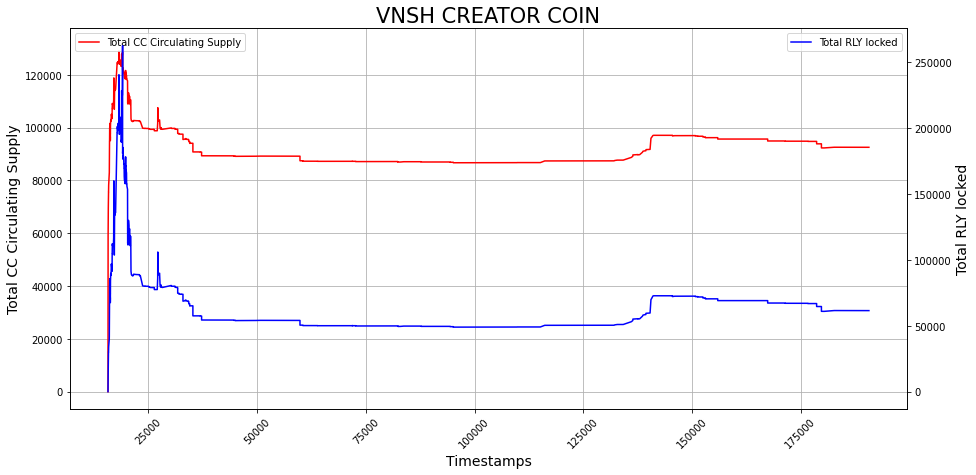

In [199]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('VNSH CREATOR COIN', fontsize=21)

ax.plot(vnshDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( vnshDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-200-325aefca0716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vnshDF['Price (in RLY)'] = vnshDF.apply(lambda row: getPrice(row), axis = 1 )


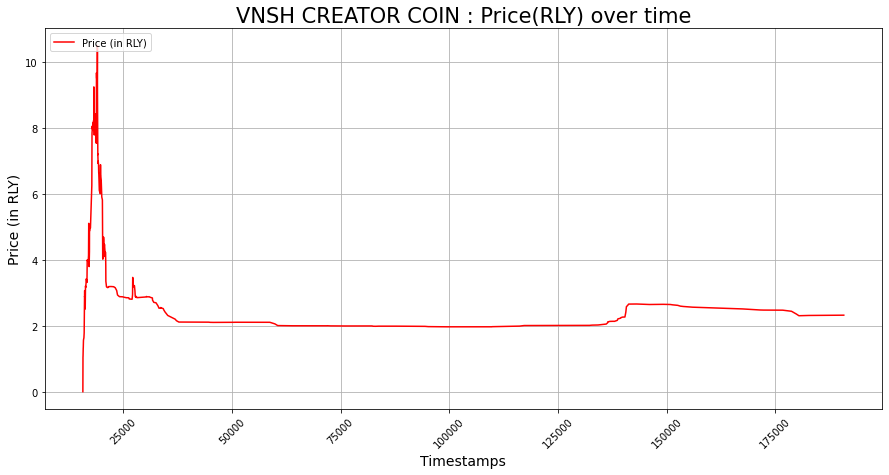

<Figure size 792x648 with 0 Axes>

In [200]:
vnshDF['Price (in RLY)'] = vnshDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('VNSH CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(vnshDF[vnshDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $VIBU Creator Coin 
Rally dashboard link - [https://rally.io/creator/VIBU/](https://rally.io/creator/VIBU/) <br>

Twitter Link - [https://twitter.com/ViBElol](https://twitter.com/ViBElol) : 5,472 Followers
Twitch link - [https://www.twitch.tv/vibelol](https://www.twitch.tv/vibelol) : 51K followers <br>

- Total RLY backing - 52.5K
- Total $VIBU - 88.4K

- Total Supporters - 113 (total A/cs that transacted in $VIBU)
- Total transactions - 256

In [201]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(vibuDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [202]:
period_min = 3
period_max = len(vibuDF)
period_init = len(vibuDF)

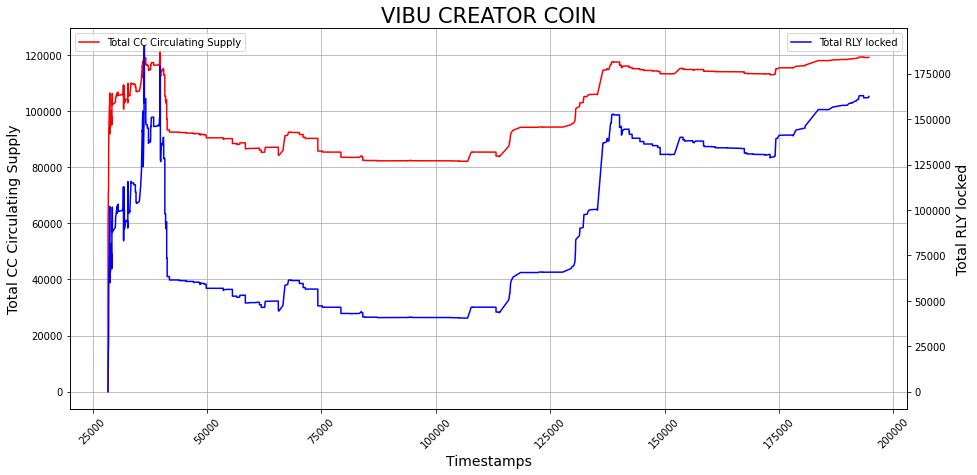

In [203]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('VIBU CREATOR COIN', fontsize=21)

ax.plot(vibuDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( vibuDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-204-a5fb7e40b102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vibuDF['Price (in RLY)'] = vibuDF.apply(lambda row: getPrice(row), axis = 1 )


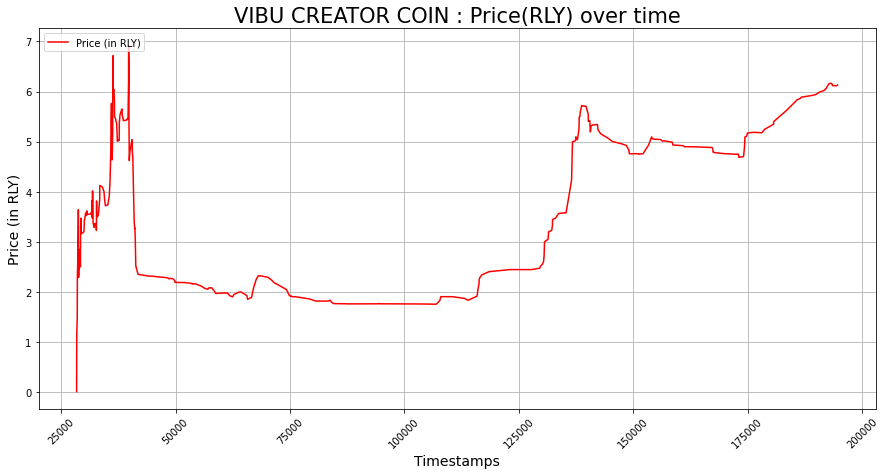

<Figure size 792x648 with 0 Axes>

In [204]:
vibuDF['Price (in RLY)'] = vibuDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('VIBU CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(vibuDF[vibuDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $JOW Creator Coin 
Rally dashboard link - [https://rally.io/creator/JOW/](https://rally.io/creator/JOW/) <br>

Twitter Link - [https://twitter.com/jowyang](https://twitter.com/jowyang) : 209.5K Followers

- Total RLY backing - 43.3K
- Total $JOW - 83.7K

- Total Supporters - 225 (total A/cs that transacted in $JOW)
- Total transactions - 242

In [205]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(jowDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [206]:
period_min = 3
period_max = len(jowDF)
period_init = len(jowDF)

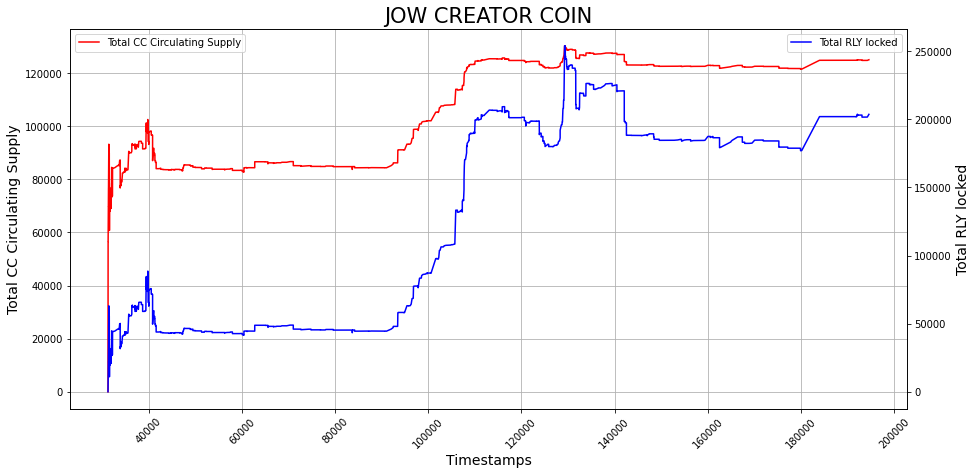

In [207]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('JOW CREATOR COIN', fontsize=21)

ax.plot(jowDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( jowDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-208-bafb5f9a01fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jowDF['Price (in RLY)'] = jowDF.apply(lambda row: getPrice(row), axis = 1 )


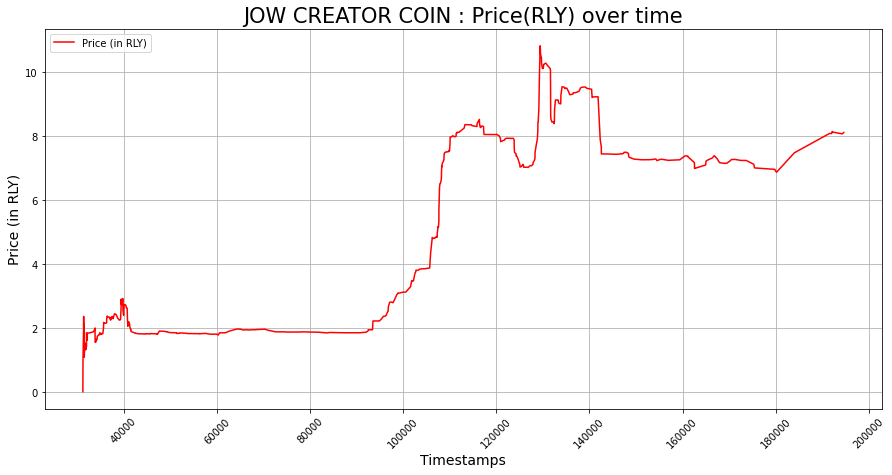

<Figure size 792x648 with 0 Axes>

In [208]:
jowDF['Price (in RLY)'] = jowDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('JOW CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(jowDF[jowDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $BEE Creator Coin 
Rally dashboard link - [https://rally.io/creator/BEE/](https://rally.io/creator/BEE/) <br>

Twitter Link - [https://twitter.com/Livibeeee](https://twitter.com/Livibeeee) : 12.4K Followers
Twitch link - [https://www.twitch.tv/livibee](https://www.twitch.tv/livibee) : 107K followers <br>

- Total RLY backing - 93.5K
- Total $BEE - 104K

- Total Supporters - 147 (total A/cs that transacted in $BEE)
- Total transactions - 248

In [209]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(beeDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [210]:
period_min = 3
period_max = len(beeDF)
period_init = len(beeDF)

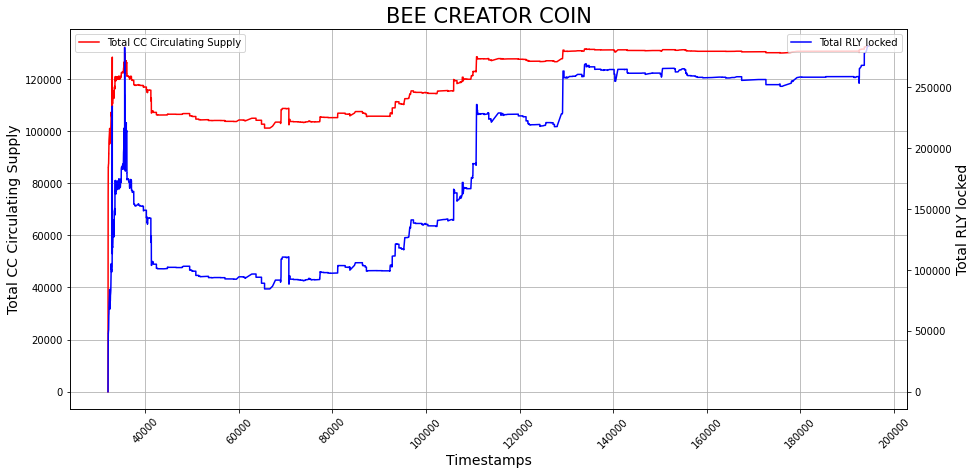

In [211]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('BEE CREATOR COIN', fontsize=21)

ax.plot(beeDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( beeDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-212-a9d96a4d58e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beeDF['Price (in RLY)'] = beeDF.apply(lambda row: getPrice(row), axis = 1 )


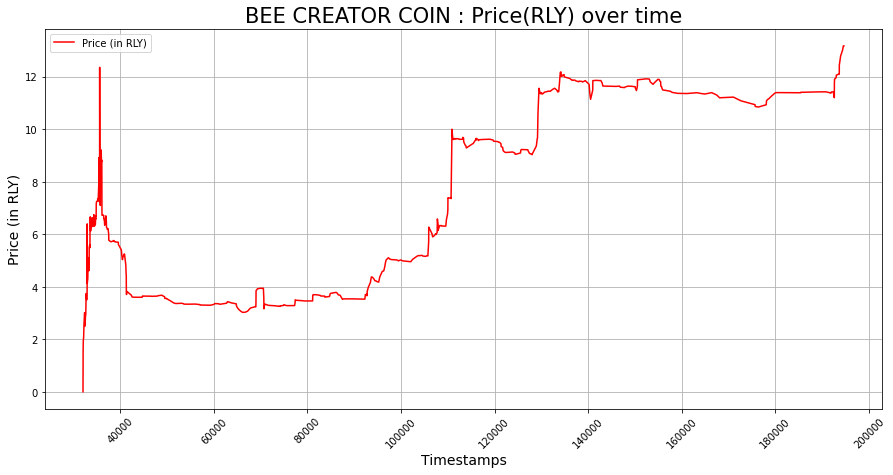

<Figure size 792x648 with 0 Axes>

In [212]:
beeDF['Price (in RLY)'] = beeDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('BEE CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(beeDF[beeDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))

### $BOO Creator Coin 
Rally dashboard link - [https://rally.io/creator/BOO/](https://rally.io/creator/BOO/) <br>

Twitter Link - [https://twitter.com/iambomanix](https://twitter.com/iambomanix) : 25.1K Followers  <br>

- Total RLY backing - 59.4K
- Total $BOO - 91.6K

- Total Supporters - 118 (total A/cs that transacted in $BOO)
- Total transactions - 102

In [213]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(booDF.sort_values(by=['GMT'])[['Supply Change','Total Circulating Supply','Total RLY locked']])

In [214]:
period_min = 3
period_max = len(booDF)
period_init = len(booDF)

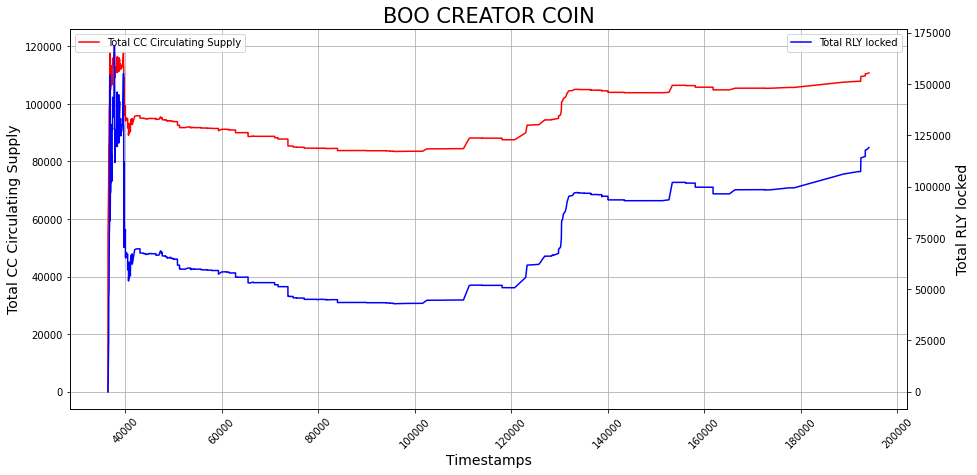

In [215]:

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('BOO CREATOR COIN', fontsize=21)

ax.plot(booDF['Total Circulating Supply'], '-r',label="Total CC Circulating Supply")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Total CC Circulating Supply",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( booDF['Total RLY locked'],'-b',label="Total RLY locked")
ax2.set_ylabel("Total RLY locked",fontsize=14)
ax2.legend(loc='upper right')

<ipython-input-216-7082ca6ef75e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booDF['Price (in RLY)'] = booDF.apply(lambda row: getPrice(row), axis = 1 )


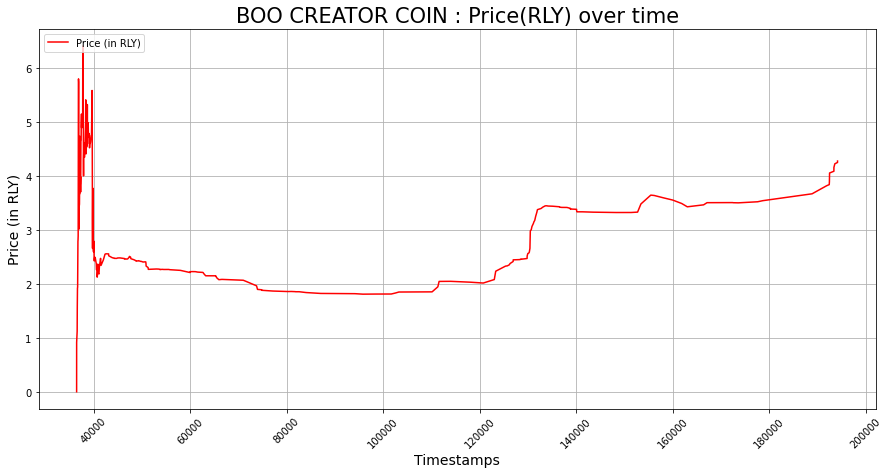

<Figure size 792x648 with 0 Axes>

In [216]:
booDF['Price (in RLY)'] = booDF.apply(lambda row: getPrice(row), axis = 1 )

fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('BOO CREATOR COIN : Price(RLY) over time', fontsize=21)

ax.plot(booDF[booDF['Price (in RLY)']>0]['Price (in RLY)'], '-r',label="Price (in RLY)")
ax.set_xlabel("Timestamps",fontsize=14)
ax.set_ylabel("Price (in RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)


fig = plt.figure(figsize=(11,9))